--- 분석 결과 ---
가정 변경 후 월간 평균 호출 대기시간: 6.42분
월간 평균 픽업 대기시간: 35.00분
총 30개의 파일을 찾았습니다.
1. 'monthly_status_counts.png' 그래프가 생성되었습니다.
2. 'monthly_avg_waiting_time_trend.png' 그래프가 생성되었습니다.
3. 'monthly_demand_and_service_trends.png' 그래프가 생성되었습니다.


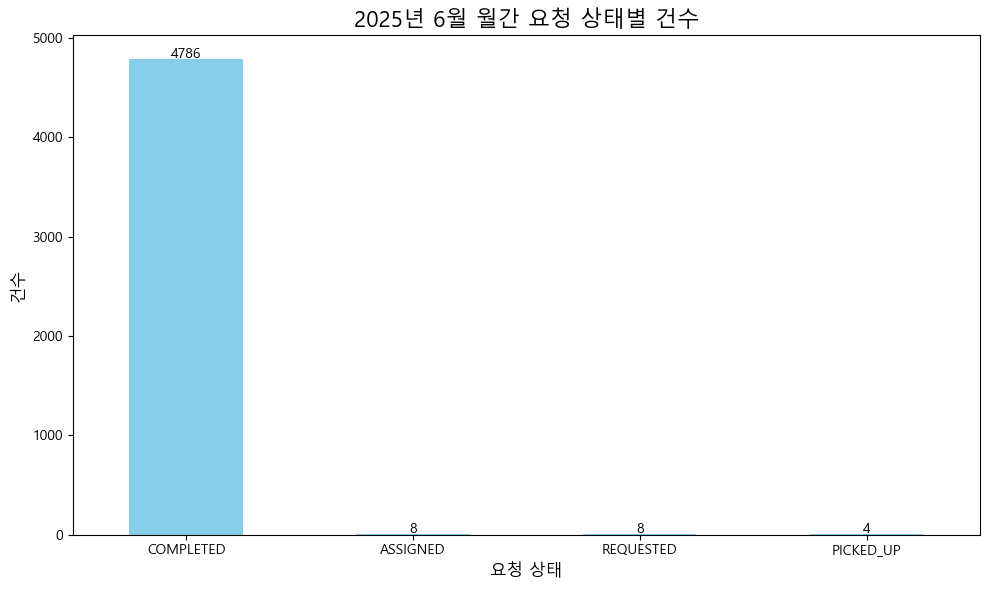

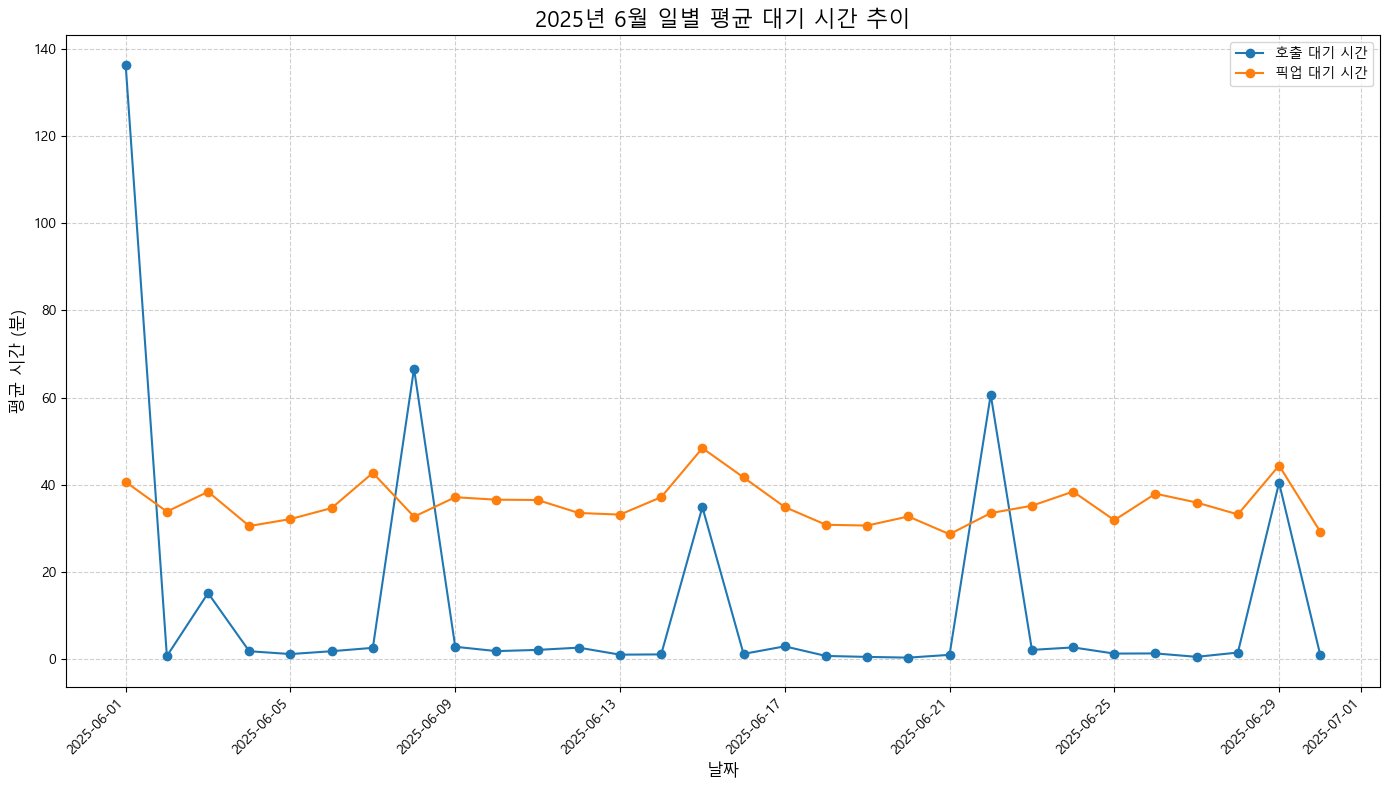

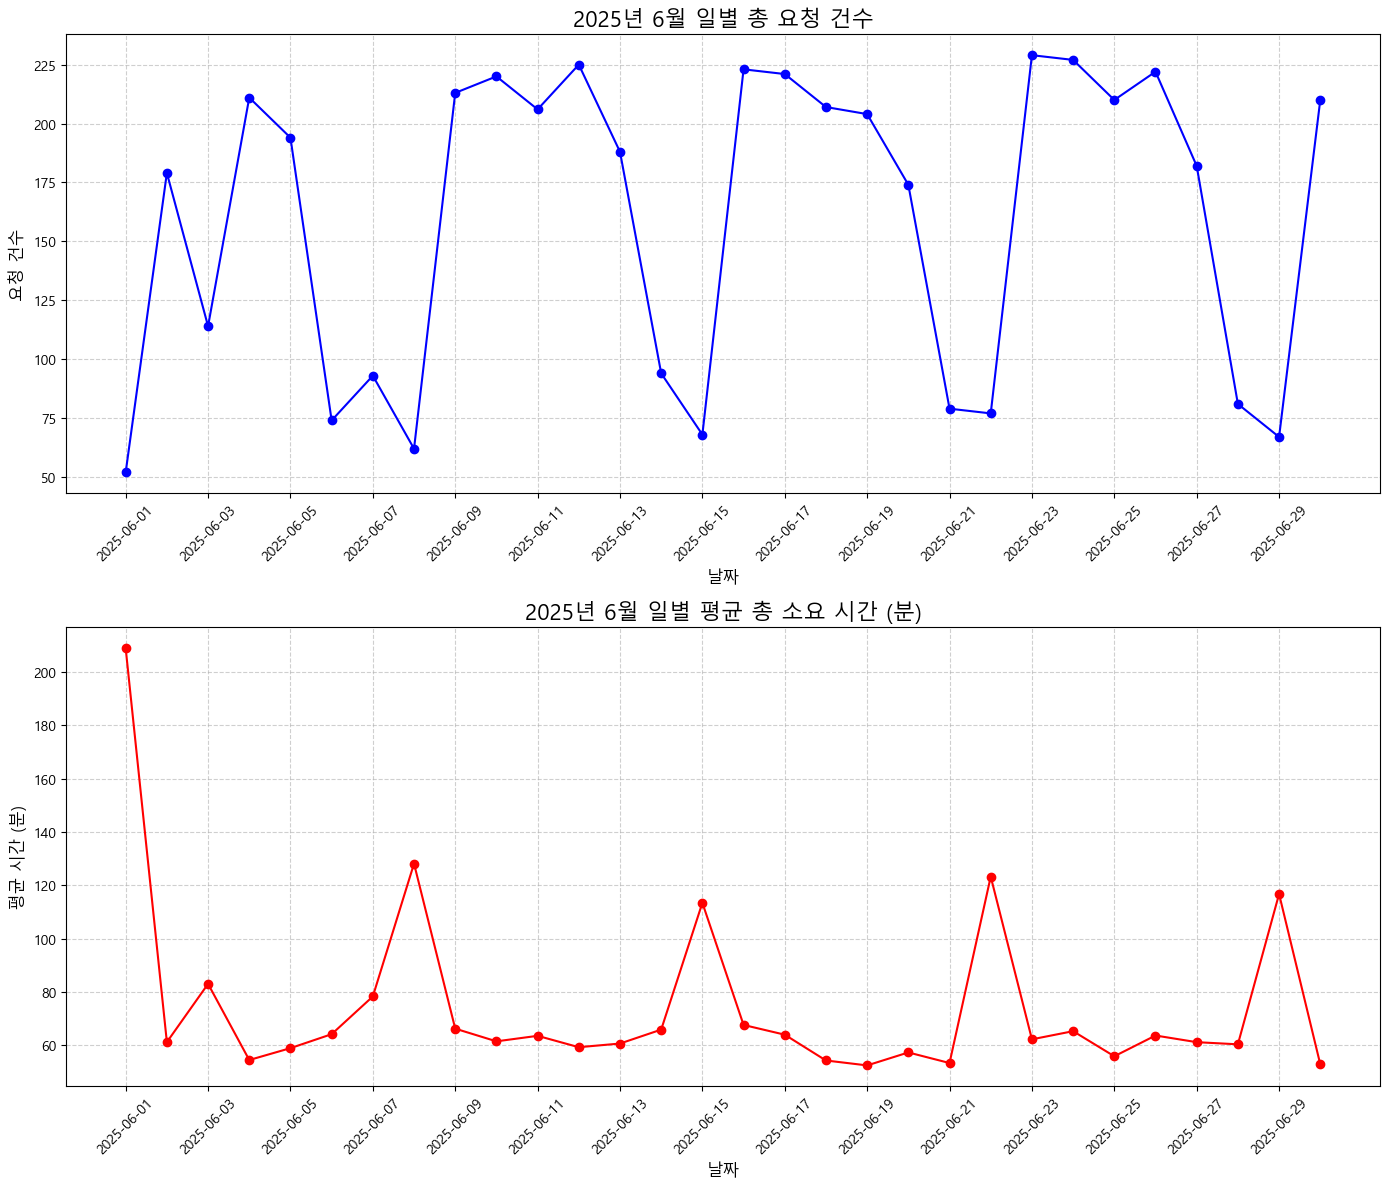

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os


# --- 고객님의 파일 경로를 여기에 입력하세요 ---
# 예: r'C:\Users\hc_park\Desktop\화성특별교통수단시뮬레이션\results'
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# 지정된 폴더 내의 모든 CSV 파일 목록 가져오기
file_list = glob.glob(os.path.join(folder_path, 'baseline_demand_log_202506*.csv'))

if not file_list:
    print("지정된 폴더에서 파일을 찾을 수 없습니다. 경로를 다시 확인해주세요.")
else:
    # 모든 파일을 담을 빈 리스트 생성
    dfs = []
    
    # 각 파일을 순회하며 데이터프레임으로 읽어와 리스트에 추가
    for file in file_list:
        df = pd.read_csv(file)
        dfs.append(df)

    # 모든 데이터프레임 합치기
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # requested 상태인 디맨드의 호출 대기시간을 3시간(180분)으로 변경
    # .loc를 사용하여 복사 경고를 방지하고 원본 데이터프레임을 안전하게 수정합니다.
    combined_df.loc[combined_df['status'] == 'REQUESTED', 'call_waiting_minutes'] = 180
    
    # 변경된 데이터프레임을 기준으로 한달간의 평균 호출 대기시간과 픽업 대기시간 계산
    avg_call_waiting = combined_df['call_waiting_minutes'].mean()
    avg_pickup_waiting = combined_df['pickup_waiting_minutes'].mean()
    
    print("--- 분석 결과 ---")
    print(f"가정 변경 후 월간 평균 호출 대기시간: {avg_call_waiting:.2f}분")
    print(f"월간 평균 픽업 대기시간: {avg_pickup_waiting:.2f}분")


# 한글 폰트 설정 (Windows 사용자용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


if not file_list:
    print("지정된 폴더에서 파일을 찾을 수 없습니다. 경로를 다시 확인해주세요.")
else:
    print(f"총 {len(file_list)}개의 파일을 찾았습니다.")

    # 모든 파일을 담을 빈 리스트 생성
    dfs = []
    
    # 각 파일을 순회하며 데이터프레임으로 읽어와 리스트에 추가
    for file in file_list:
        df = pd.read_csv(file)
        dfs.append(df)

    # 모든 데이터프레임 합치기
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # 'call_time' 열을 날짜/시간 형식으로 변환
    combined_df['call_time'] = pd.to_datetime(combined_df['call_time'])

    # --- 1. 월간 요청 상태별 건수 계산 및 시각화 ---
    status_counts = combined_df['status'].value_counts()
    plt.figure(figsize=(10, 6))
    status_counts.plot(kind='bar', color='skyblue')
    plt.title('2025년 6월 월간 요청 상태별 건수', fontsize=16)
    plt.xlabel('요청 상태', fontsize=12)
    plt.ylabel('건수', fontsize=12)
    plt.xticks(rotation=0)
    for index, value in enumerate(status_counts):
        plt.text(index, value + 10, str(value), ha='center')
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, 'monthly_status_counts.png'))
    print("1. 'monthly_status_counts.png' 그래프가 생성되었습니다.")

    # --- 2. 일별 평균 대기 시간 추이 시각화 ---
    daily_avg_waiting_time = combined_df.groupby(combined_df['call_time'].dt.date)[['call_waiting_minutes', 'pickup_waiting_minutes']].mean()
    plt.figure(figsize=(14, 8))
    daily_avg_waiting_time.plot(kind='line', marker='o', ax=plt.gca())
    plt.title('2025년 6월 일별 평균 대기 시간 추이', fontsize=16)
    plt.xlabel('날짜', fontsize=12)
    plt.ylabel('평균 시간 (분)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(['호출 대기 시간', '픽업 대기 시간'])
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, 'monthly_avg_waiting_time_trend.png'))
    print("2. 'monthly_avg_waiting_time_trend.png' 그래프가 생성되었습니다.")

    # --- 3. 일별 총 요청 건수와 평균 총 소요 시간(total_minutes) 추이 시각화 ---
    daily_demand = combined_df.groupby(combined_df['call_time'].dt.date).size()
    daily_avg_minutes = combined_df.groupby(combined_df['call_time'].dt.date)['total_minutes'].mean()
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))
    axes[0].plot(daily_demand.index, daily_demand.values, marker='o', color='b')
    axes[0].set_title('2025년 6월 일별 총 요청 건수', fontsize=16)
    axes[0].set_xlabel('날짜', fontsize=12)
    axes[0].set_ylabel('요청 건수', fontsize=12)
    axes[0].set_xticks(daily_demand.index[::2])
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, linestyle='--', alpha=0.6)
    axes[1].plot(daily_avg_minutes.index, daily_avg_minutes.values, marker='o', color='r')
    axes[1].set_title('2025년 6월 일별 평균 총 소요 시간 (분)', fontsize=16)
    axes[1].set_xlabel('날짜', fontsize=12)
    axes[1].set_ylabel('평균 시간 (분)', fontsize=12)
    axes[1].set_xticks(daily_avg_minutes.index[::2])
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, 'monthly_demand_and_service_trends.png'))
    print("3. 'monthly_demand_and_service_trends.png' 그래프가 생성되었습니다.")

총 30개의 파일을 찾았습니다.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3332163798.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\monthly_hourly_total_waiting_by_day_type.png' 그래프가 생성되었습니다.


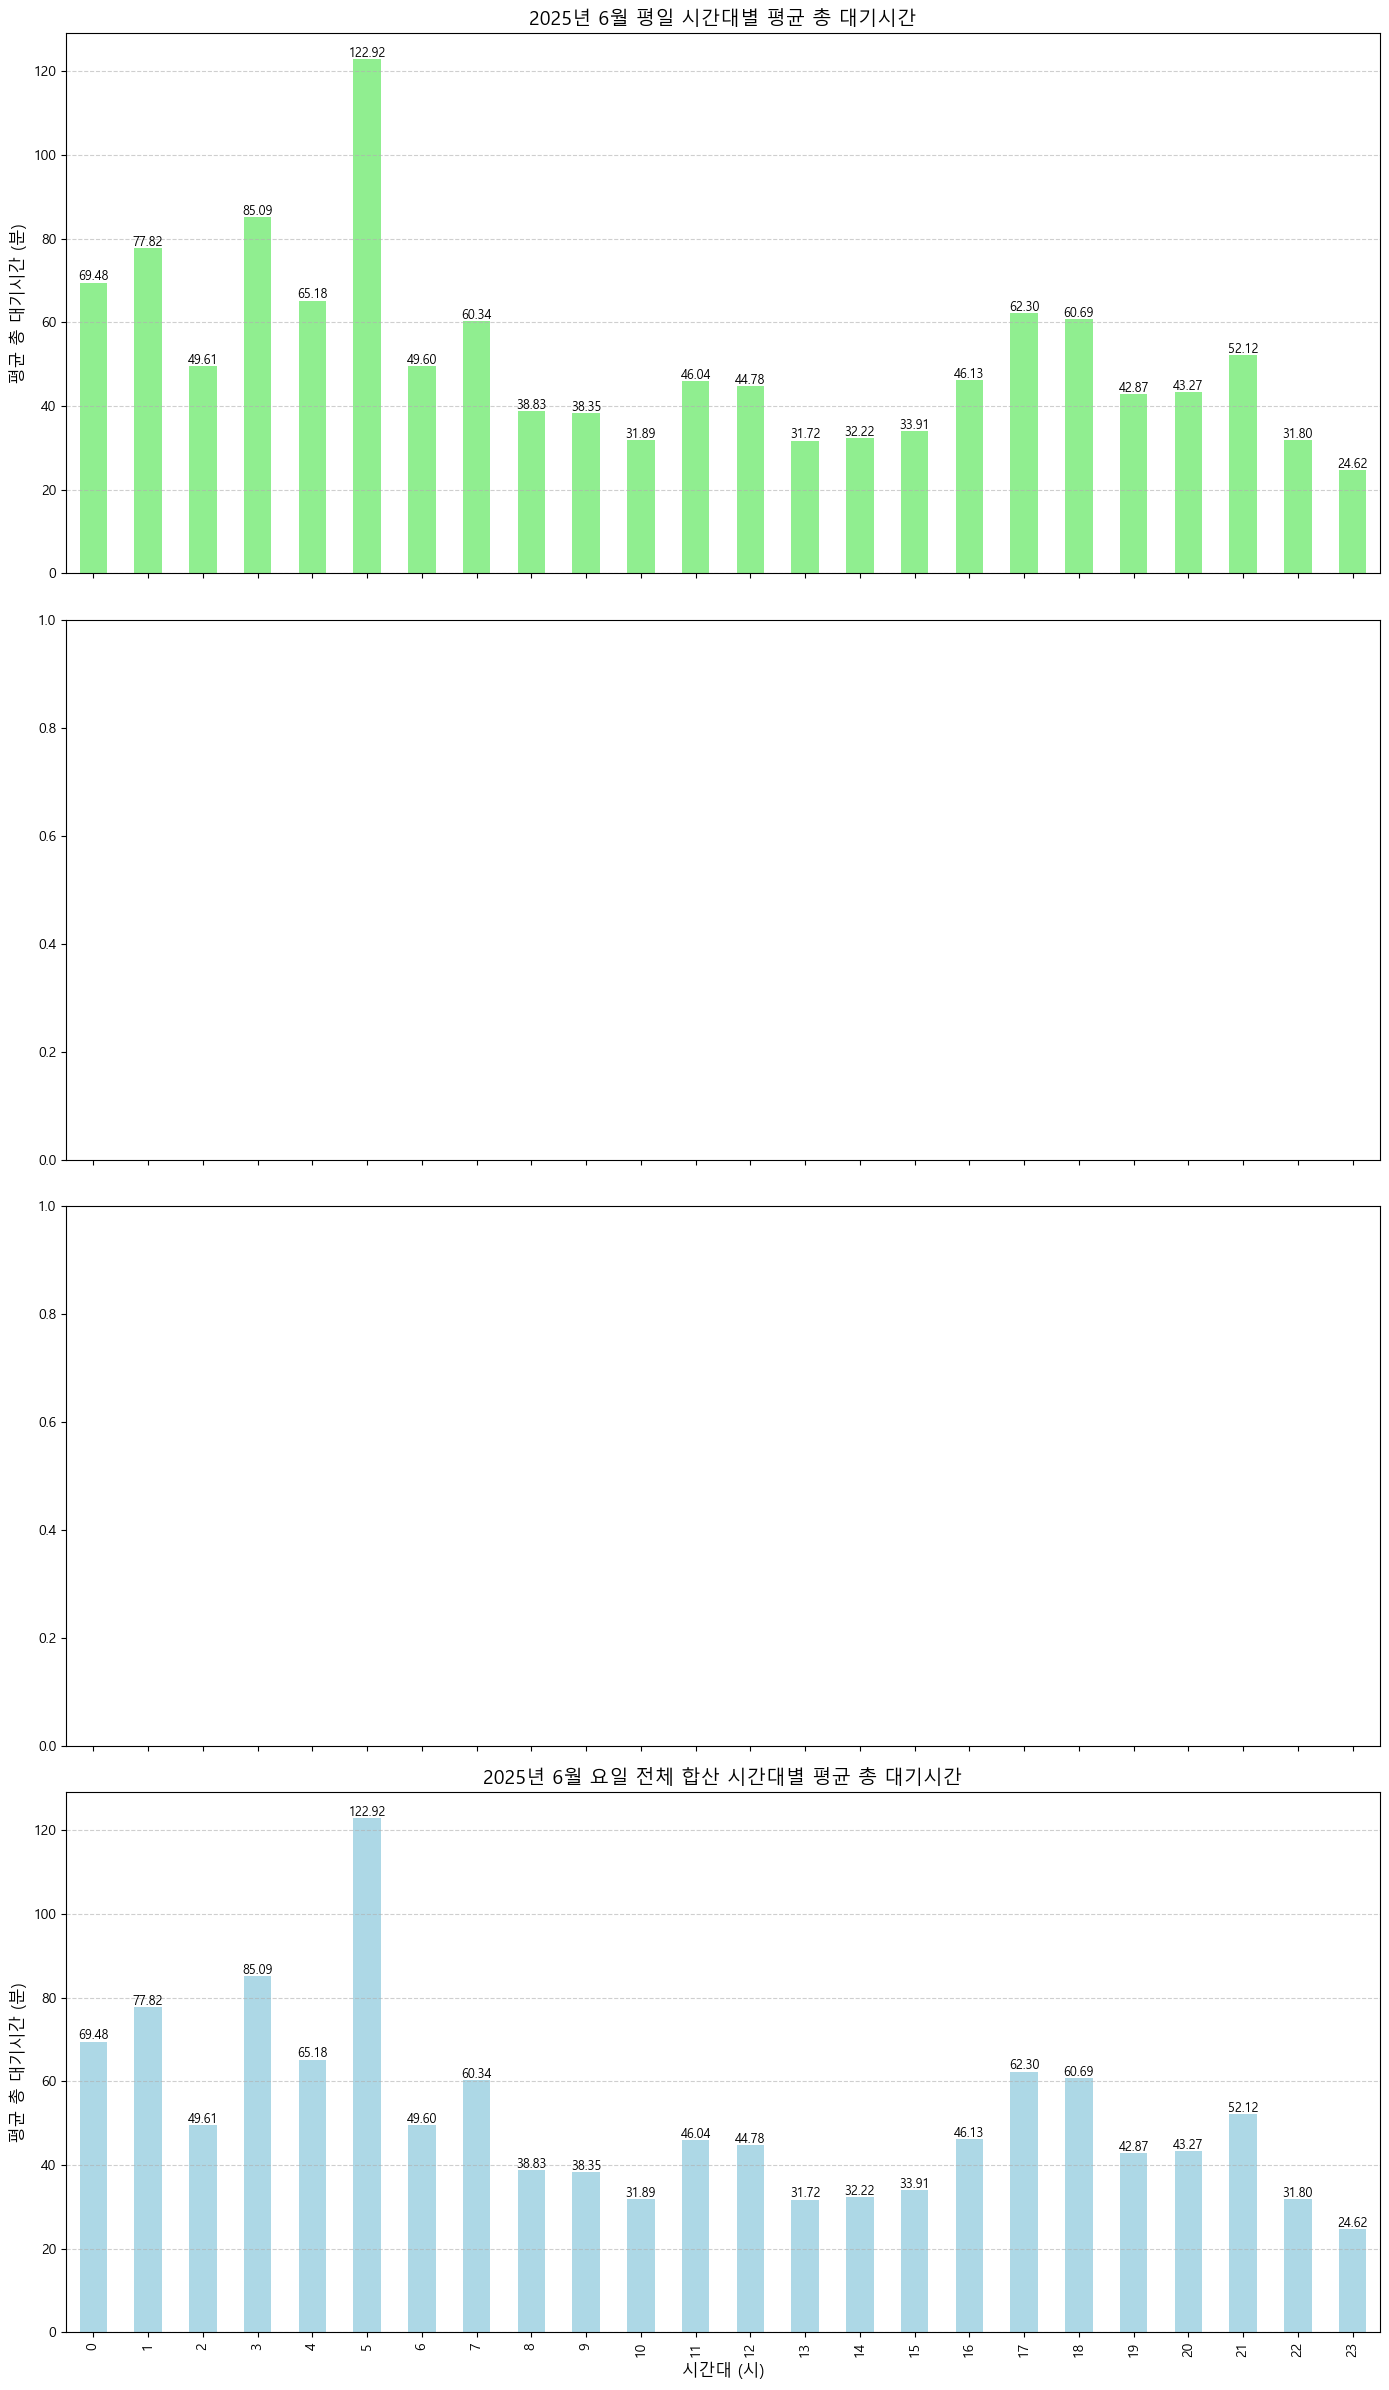

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# 'baseline_demand_log_202506'로 시작하는 모든 CSV 파일을 찾아 리스트에 저장
file_list = glob.glob(os.path.join(folder_path, 'baseline_scenario_202506*.csv'))

if not file_list:
    print(f"오류: 지정된 폴더에 'baseline_scenario_202506*.csv' 파일이 존재하지 않습니다.\n경로: {folder_path}")
else:
    print(f"총 {len(file_list)}개의 파일을 찾았습니다.")

    # 모든 파일을 담을 빈 리스트 생성
    dfs = []
    
    # 각 파일을 순회하며 데이터프레임으로 읽어와 리스트에 추가
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    # 모든 데이터프레임 합치기
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # 'call_time' 열을 날짜/시간 형식으로 변환
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    # 호출 대기시간과 픽업 대기시간을 더한 총 대기시간 계산
    combined_df['total_waiting_minutes'] = combined_df['call_waiting_time'] + combined_df['pickup_waiting_time']

    # 요일 정보 추출 및 요일 유형 분류
    combined_df['day_type'] = combined_df['request_time'].dt.dayofweek.apply(lambda x: '토요일' if x == 5 else ('일요일' if x == 6 else '평일'))

    # 요일 유형별 시간대별 총 평균 대기시간 계산
    hourly_avg_waiting_by_day = combined_df.groupby(['day_type', combined_df['request_time'].dt.hour])['total_waiting_minutes'].mean().unstack(level=0)
    
    # 요일 전체를 합산한 시간대별 총 평균 대기시간 계산
    hourly_avg_waiting_all_days = combined_df.groupby(combined_df['request_time'].dt.hour)['total_waiting_minutes'].mean()

    # 서브플롯을 포함한 전체 그래프 생성
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 24), sharex=True)

    day_order = ['평일', '토요일', '일요일', '요일 전체 합산']
    colors = ['lightgreen', 'orange', 'lightcoral', 'lightblue']
    
    # 각 요일 유형별 그래프 생성
    for i, day in enumerate(day_order[:3]):
        ax = axes[i]
        if day in hourly_avg_waiting_by_day.columns:
            hourly_data = hourly_avg_waiting_by_day[day].reindex(range(24), fill_value=0)
            
            hourly_data.plot(kind='bar', ax=ax, color=colors[i])
            ax.set_title(f'2025년 6월 {day} 시간대별 평균 총 대기시간', fontsize=14)
            ax.set_ylabel('평균 총 대기시간 (분)', fontsize=12)
            ax.grid(axis='y', linestyle='--', alpha=0.6)
            
            for p in ax.patches:
                height = p.get_height()
                if not pd.isna(height):
                    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', fontsize=9)
    
    # 요일 전체 합산 그래프 생성
    ax_all = axes[3]
    hourly_avg_waiting_all_days = hourly_avg_waiting_all_days.reindex(range(24), fill_value=0)
    hourly_avg_waiting_all_days.plot(kind='bar', ax=ax_all, color=colors[3])
    ax_all.set_title('2025년 6월 요일 전체 합산 시간대별 평균 총 대기시간', fontsize=14)
    ax_all.set_xlabel('시간대 (시)', fontsize=12)
    ax_all.set_ylabel('평균 총 대기시간 (분)', fontsize=12)
    ax_all.grid(axis='y', linestyle='--', alpha=0.6)
    for p in ax_all.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax_all.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', fontsize=9)

    plt.tight_layout()

    plot_path = os.path.join(folder_path, 'monthly_hourly_total_waiting_by_day_type.png')
    plt.savefig(plot_path)

    print(f"'{plot_path}' 그래프가 생성되었습니다.")

1. [현행 시나리오] Baseline 파일 분석 시작
'baseline_demand_log_202506*.csv' 파일들을 분석 중입니다. 총 30개.

2. [권역 분석 시나리오] Region Analysis 파일 분석 시작
'region_analysis_demand_log_50pct_202506*.csv' 파일들을 분석 중입니다. 총 30개.


비교 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\depot_waiting_time_comparison.png'에 성공적으로 저장되었습니다.


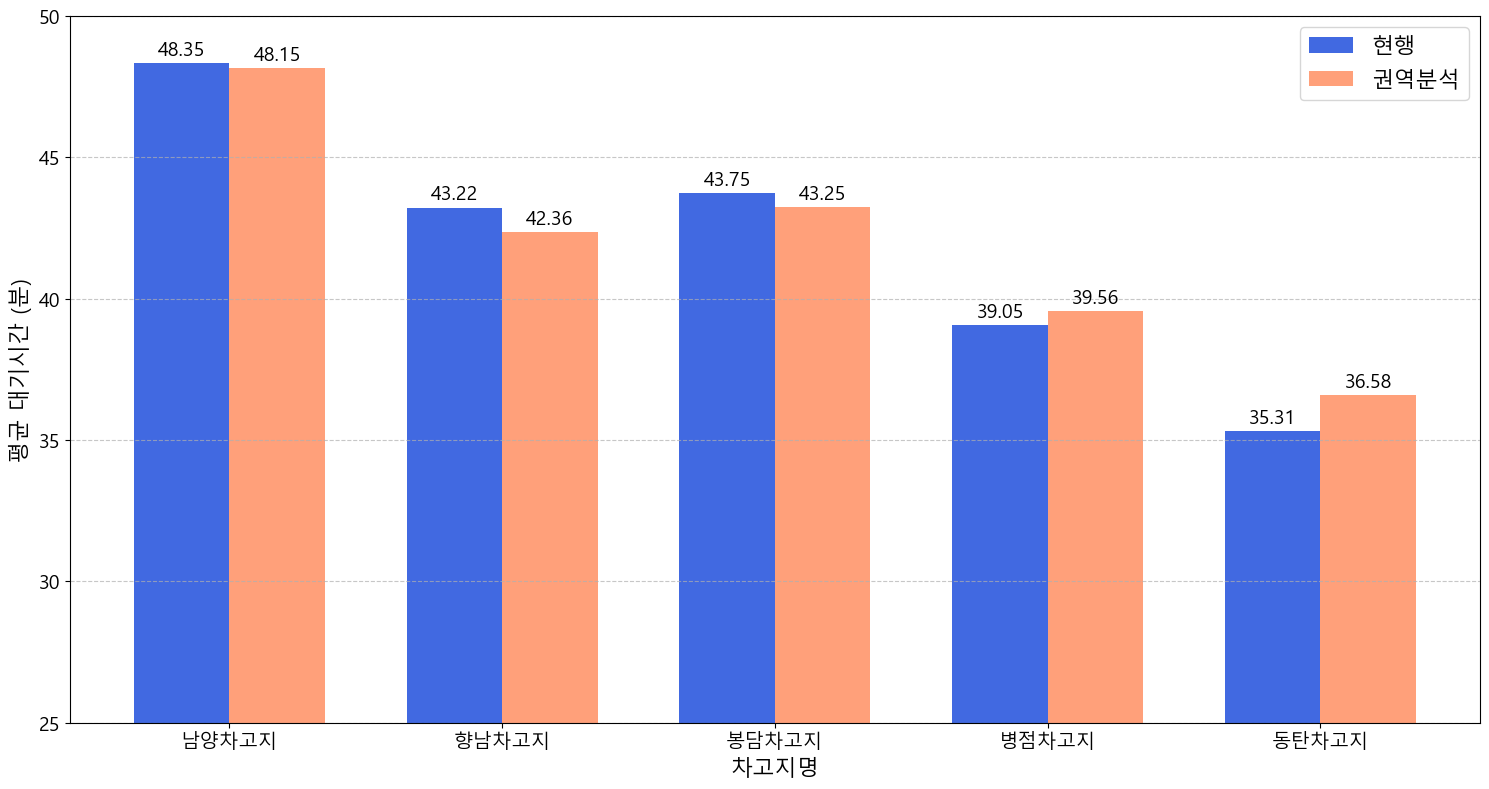

In [64]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def calculate_waiting_time_by_depot(file_pattern, folder_path):
    """
    지정된 패턴의 파일들을 모두 불러와 pickup_depot_name별 평균 대기시간을 계산합니다.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    if not file_list:
        print(f"경고: '{file_pattern}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None

    print(f"'{file_pattern}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file in file_list:
        try:
            df_temp = pd.read_csv(file, encoding='cp949')
        except UnicodeDecodeError:
            try:
                df_temp = pd.read_csv(file, encoding='utf-8')
            except UnicodeDecodeError:
                df_temp = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df_temp)

    combined_df = pd.concat(dfs, ignore_index=True)

    # 대기시간 계산 (콜 대기시간 + 차량 대기시간)
    if 'call_waiting_minutes' in combined_df.columns and 'pickup_waiting_minutes' in combined_df.columns:
        combined_df['total_waiting_minutes'] = combined_df['call_waiting_minutes'] + combined_df['pickup_waiting_minutes']
    else:
        print(f"오류: '{file_pattern}' 파일에 'call_waiting_minutes' 또는 'pickup_waiting_minutes' 컬럼이 없습니다.")
        return None
    
    if 'pickup_depot_name' not in combined_df.columns:
        print(f"오류: '{file_pattern}' 파일에 'pickup_depot_name' 컬럼이 없습니다.")
        return None

    avg_waiting_by_depot = combined_df.groupby('pickup_depot_name')['total_waiting_minutes'].mean()
    
    return avg_waiting_by_depot

def plot_waiting_times(baseline_data, region_analysis_data, folder_path):
    """
    두 시나리오의 대기시간 데이터를 막대 그래프로 시각화합니다.
    """
    # 데이터프레임 병합
    df_plot = pd.DataFrame({
        '현행': baseline_data,
        '권역분석': region_analysis_data
    }).fillna(0)
    
    # --- 순서 변경 코드 추가 ---
    # 원하는 차고지 순서를 리스트로 정의
    depot_order = ['남양차고지', '향남차고지', '봉담차고지', '병점차고지', '동탄차고지']
    
    # 데이터프레임의 인덱스를 재정렬하여 순서를 변경
    df_plot = df_plot.reindex(depot_order)
    # --- 순서 변경 코드 추가 ---
    
    labels = df_plot.index
    x = np.arange(len(labels))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(15, 8))
    rects1 = ax.bar(x - width/2, df_plot['현행'], width, label='현행', color='royalblue')
    rects2 = ax.bar(x + width/2, df_plot['권역분석'], width, label='권역분석', color='lightsalmon')
    
    ax.bar_label(rects1, padding=3, fmt='%.2f', fontsize=14)
    ax.bar_label(rects2, padding=3, fmt='%.2f', fontsize=14)

    plt.ylim(25, 50)
    
    #ax.set_title('시나리오별 차고지 대기시간 비교', fontsize=20)
    ax.set_xlabel('차고지명', fontsize=16)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=16)

    plt.xticks(x, labels, rotation=0, ha='center', fontsize=14)
    plt.yticks(fontsize=14)
    
    ax.legend(fontsize=16)
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    
    plot_path = os.path.join(folder_path, 'depot_waiting_time_comparison.png')
    plt.savefig(plot_path)
    print(f"\n비교 그래프가 '{plot_path}'에 성공적으로 저장되었습니다.")

# --- 파일 경로 및 시나리오 정의 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'
baseline_pattern = 'baseline_demand_log_202506*.csv'
region_analysis_pattern = 'region_analysis_demand_log_50pct_202506*.csv'

# --- 결과 계산 ---
print("="*50)
print("1. [현행 시나리오] Baseline 파일 분석 시작")
print("="*50)
baseline_results = calculate_waiting_time_by_depot(baseline_pattern, folder_path)

print("="*50)
print("2. [권역 분석 시나리오] Region Analysis 파일 분석 시작")
print("="*50)
region_analysis_results = calculate_waiting_time_by_depot(region_analysis_pattern, folder_path)

# --- 결과 시각화 ---
if baseline_results is not None and region_analysis_results is not None:
    plot_waiting_times(baseline_results, region_analysis_results, folder_path)
else:
    print("\n데이터가 충분하지 않아 그래프를 그릴 수 없습니다.")

1. [현행 시나리오] Baseline 파일 분석 시작
'baseline_demand_log_202506*.csv' 파일들을 분석 중입니다. 총 30개.

2. [권역 분석 시나리오] Region Analysis 파일 분석 시작
'region_analysis_demand_log_50pct_202506*.csv' 파일들을 분석 중입니다. 총 30개.


비교 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\depot_waiting_time_percentage_change.png'에 성공적으로 저장되었습니다.


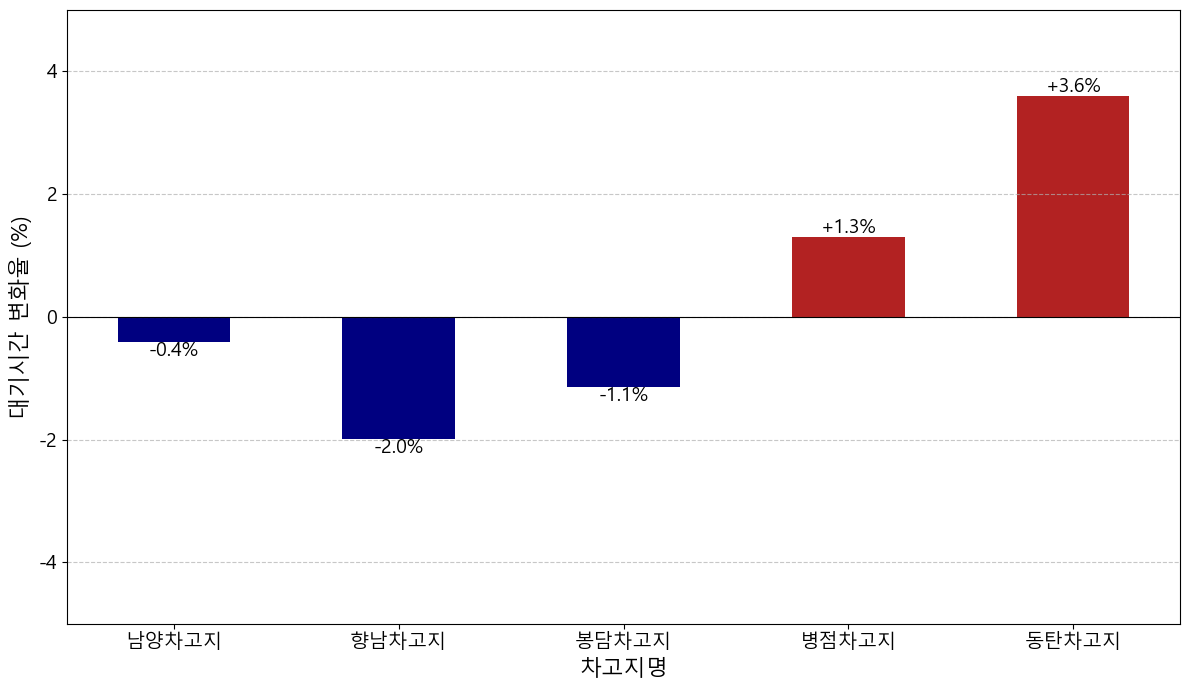

In [198]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14
bar_width = 0.5

# y축 범위 조절 변수 (직접 값 설정)
y_min = -5 # 최소값
y_max = 5  # 최대값

def calculate_waiting_time_by_depot(file_pattern, folder_path):
    """
    지정된 패턴의 파일들을 모두 불러와 pickup_depot_name별 평균 대기시간을 계산합니다.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    if not file_list:
        print(f"경고: '{file_pattern}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None

    print(f"'{file_pattern}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file in file_list:
        try:
            df_temp = pd.read_csv(file, encoding='cp949')
        except UnicodeDecodeError:
            try:
                df_temp = pd.read_csv(file, encoding='utf-8')
            except UnicodeDecodeError:
                df_temp = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df_temp)

    combined_df = pd.concat(dfs, ignore_index=True)

    # 대기시간 계산 (콜 대기시간 + 차량 대기시간)
    if 'call_waiting_minutes' in combined_df.columns and 'pickup_waiting_minutes' in combined_df.columns:
        combined_df['total_waiting_minutes'] = combined_df['call_waiting_minutes'] + combined_df['pickup_waiting_minutes']
    else:
        print(f"오류: '{file_pattern}' 파일에 'call_waiting_minutes' 또는 'pickup_waiting_minutes' 컬럼이 없습니다.")
        return None
    
    if 'pickup_depot_name' not in combined_df.columns:
        print(f"오류: '{file_pattern}' 파일에 'pickup_depot_name' 컬럼이 없습니다.")
        return None

    avg_waiting_by_depot = combined_df.groupby('pickup_depot_name')['total_waiting_minutes'].mean()
    
    return avg_waiting_by_depot

def plot_percentage_change(baseline_data, region_analysis_data, folder_path, y_min, y_max):
    """
    현행 대비 증감 퍼센트를 막대 그래프로 시각화합니다.
    """
    # 데이터프레임 병합 및 순서 재정렬
    df_plot = pd.DataFrame({
        '현행': baseline_data,
        '권역분석': region_analysis_data
    }).fillna(0)
    
    depot_order = ['남양차고지', '향남차고지', '봉담차고지', '병점차고지', '동탄차고지']
    df_plot = df_plot.reindex(depot_order)
    
    # 현행 대비 변화율 계산
    # 현행 데이터가 0인 경우, 무한대 또는 NaN이 되지 않도록 0으로 처리
    df_plot['변화율 (%)'] = (df_plot['권역분석'] - df_plot['현행']) / df_plot['현행'] * 100
    df_plot.loc[df_plot['현행'] == 0, '변화율 (%)'] = 0
    
    labels = df_plot.index
    x = np.arange(len(labels))
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # 막대 색상 설정: 증가(양수)는 초록색, 감소(음수)는 빨간색
    colors = ['firebrick' if val > 0 else 'navy' for val in df_plot['변화율 (%)']]
    bars = ax.bar(x, df_plot['변화율 (%)'], width=bar_width, color=colors)
    
    # 막대 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, 
                f'{height:+.1f}%', # 양수/음수 부호 포함, 소수점 첫째 자리까지
                ha='center', va='bottom' if height >= 0 else 'top', 
                fontsize=value_fontsize)

    # 0% 기준선 추가
    ax.axhline(0, color='black', linewidth=0.8)
    
    # y축 범위 설정
    ax.set_ylim(y_min, y_max)
    
    #ax.set_title('현행 대비 시나리오별 차고지 대기시간 변화율', fontsize=title_fontsize)
    ax.set_xlabel('차고지명', fontsize=label_fontsize)
    ax.set_ylabel('대기시간 변화율 (%)', fontsize=label_fontsize)

    plt.xticks(x, labels, rotation=0, ha='center', fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    
    plot_path = os.path.join(folder_path, 'depot_waiting_time_percentage_change.png')
    plt.savefig(plot_path)
    print(f"\n비교 그래프가 '{plot_path}'에 성공적으로 저장되었습니다.")


# --- 파일 경로 및 시나리오 정의 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'
baseline_pattern = 'baseline_demand_log_202506*.csv'
region_analysis_pattern = 'region_analysis_demand_log_50pct_202506*.csv'

# --- 결과 계산 ---
print("="*50)
print("1. [현행 시나리오] Baseline 파일 분석 시작")
print("="*50)
baseline_results = calculate_waiting_time_by_depot(baseline_pattern, folder_path)

print("="*50)
print("2. [권역 분석 시나리오] Region Analysis 파일 분석 시작")
print("="*50)
region_analysis_results = calculate_waiting_time_by_depot(region_analysis_pattern, folder_path)

# --- 결과 시각화 ---
if baseline_results is not None and region_analysis_results is not None:
    plot_percentage_change(baseline_results, region_analysis_results, folder_path, y_min, y_max)
else:
    print("\n데이터가 충분하지 않아 그래프를 그릴 수 없습니다.")

'baseline_demand_log' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v21_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v22_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v23_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v24_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v25_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v26_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v27_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v28_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v29_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)



------------------------------------------------------
시나리오별 평균 대기시간을 비교하는 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\scenario_waiting_times_comparison.png'에 저장되었습니다.


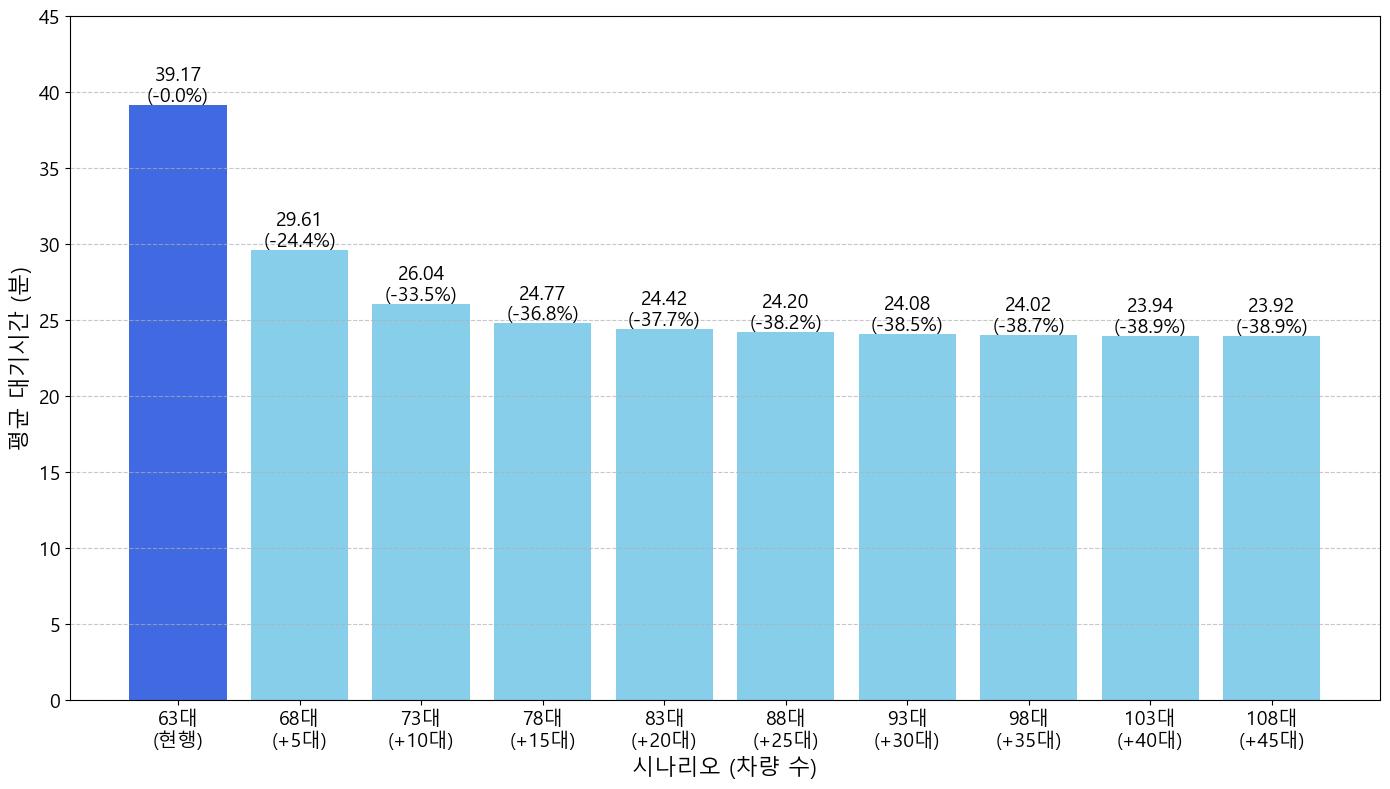

In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 0
y_max = 45

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name):
    """
    주어진 파일 목록의 데이터를 합쳐 평균 대기시간을 계산합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None

    print(f"'{group_name}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- 각 시나리오별 평균 대기시간을 저장할 리스트 ---
scenario_data = []

# --- 1. 현행(baseline) 시나리오 평균 대기시간 계산 ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': '63대\n(현행)', 'average_time': avg_baseline})

# --- 2. 추가 차량수 시나리오별 평균 대기시간 계산 ---
for n_additional in range(21, 30):
    #m_total = 68 + (n_additional - 1) * 5
    
    # 파일 패턴 생성
    file_pattern = f'scheduled_increase_scenario_v{n_additional}_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # 평균 대기시간 계산
    avg_additional = calculate_group_average(additional_file_list, file_pattern)
    
    if avg_additional is not None:
        scenario_name = f'{63+(n_additional-20)*5}대\n(+{(n_additional-20)*5}대)'
        scenario_data.append({'scenario_name': scenario_name, 'average_time': avg_additional})

# --- 시나리오별 평균 대기시간 비교 그래프 생성 ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # 현행 시나리오의 평균 대기시간을 기준으로 감소율 계산
    baseline_time = df_results[df_results['scenario_name'] == '63대\n(현행)']['average_time'].iloc[0]
    df_results['decrease_rate'] = ((baseline_time - df_results['average_time']) / baseline_time) * 100

    # 현행 시나리오만 다른 색상으로 지정
    colors = ['royalblue'] + ['skyblue'] * (len(df_results) - 1)

    fig, ax = plt.subplots(figsize=(14, 8))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('시나리오별 평균 대기시간 비교', fontsize=title_fontsize)
    ax.set_xlabel('시나리오 (차량 수)', fontsize=label_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    
    # x축 라벨 수정 (두 줄로 표시)
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # y축 범위 설정
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # 각 막대 위에 값 및 감소율 표시
    for bar in bars:
        height = bar.get_height()
        scenario_name = df_results.loc[df_results['average_time'] == height, 'scenario_name'].iloc[0]
        
        # 현행 시나리오는 감소율을 표시하지 않음
        if scenario_name == '현행':
            text = f'{height:.2f}'
        else:
            decrease_rate = df_results.loc[df_results['average_time'] == height, 'decrease_rate'].iloc[0]
            text = f'{height:.2f}\n(-{decrease_rate:.1f}%)'
        
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'scenario_waiting_times_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시나리오별 평균 대기시간을 비교하는 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

'baseline_demand_log' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2201626489.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2201626489.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2201626489.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2201626489.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
시나리오별 평균 대기시간을 비교하는 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\baseline_vs_universal_comparison.png'에 저장되었습니다.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2201626489.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


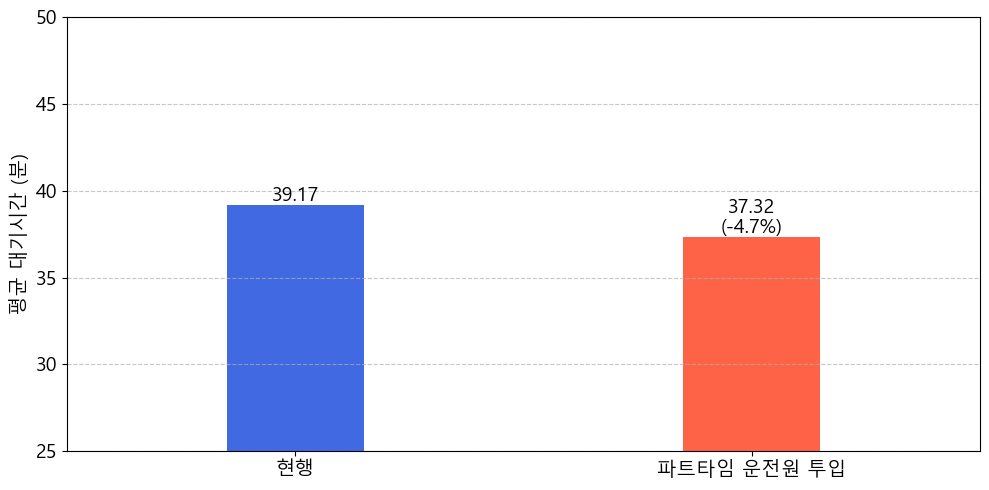

In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 25
y_max = 50

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

# 막대 너비 조절 (기본값: 0.8)
bar_width = 0.3

def calculate_group_average(file_list, group_name):
    """
    주어진 파일 목록의 데이터를 합쳐 평균 대기시간을 계산합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None

    print(f"'{group_name}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- 각 시나리오별 평균 대기시간을 저장할 리스트 ---
scenario_data = []

# --- 1. 현행(baseline) 시나리오 평균 대기시간 계산 ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': '현행', 'average_time': avg_baseline})

# --- 2. 범용 시나리오 평균 대기시간 계산 ---
universal_file_list = glob.glob(os.path.join(folder_path, 'scheduled_increase_scenario_v1_202506*.csv'))
avg_universal = calculate_group_average(universal_file_list, 'scheduled_increase_scenario_v1')
if avg_universal is not None:
    scenario_data.append({'scenario_name': '파트타임 운전원 투입', 'average_time': avg_universal})

# --- 시나리오별 평균 대기시간 비교 그래프 생성 ---
if scenario_data and len(scenario_data) > 1:
    df_results = pd.DataFrame(scenario_data)

    # 현행 시나리오와 범용 시나리오 색상 지정
    colors = ['royalblue', 'tomato']

    # 그래프 크기를 줄여 중앙에 위치하도록 조정
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], width=bar_width, color=colors)
    
    # x축 범위에 여백을 주어 중앙 정렬 효과
    ax.set_xlim(-0.5, len(df_results) - 0.5)

    #ax.set_title('현행 vs. 범용 시나리오 평균 대기시간 비교', fontsize=title_fontsize)
    #ax.set_xlabel('시나리오', fontsize=label_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # y축 범위 설정
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # 각 막대 위에 값 표시
    for i, bar in enumerate(bars):
        height = bar.get_height()
        scenario_name = df_results['scenario_name'].iloc[i]
        
        text_to_display = f'{height:.2f}'
        
        # '관내/관외 구분 x' 시나리오인 경우에만 변화율 계산 및 추가
        if scenario_name == '파트타임 운전원 투입' and avg_baseline is not None:
            # 현행 대비 변화율 계산
            percentage_change = ((height - avg_baseline) / avg_baseline) * 100
            
            # 변화율 텍스트 형식 설정 (양수/음수 부호 포함)
            text_to_display += f'\n({percentage_change:+.1f}%)'
        
        ax.text(bar.get_x() + bar.get_width()/2., height, text_to_display, 
                ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'baseline_vs_universal_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시나리오별 평균 대기시간을 비교하는 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없거나 데이터가 부족하여 그래프를 생성할 수 없습니다.")

'baseline_with_shift' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1152076075.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1152076075.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1152076075.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1152076075.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
그룹 막대 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\grouped_waiting_times_comparison_reordered.png'에 저장되었습니다.


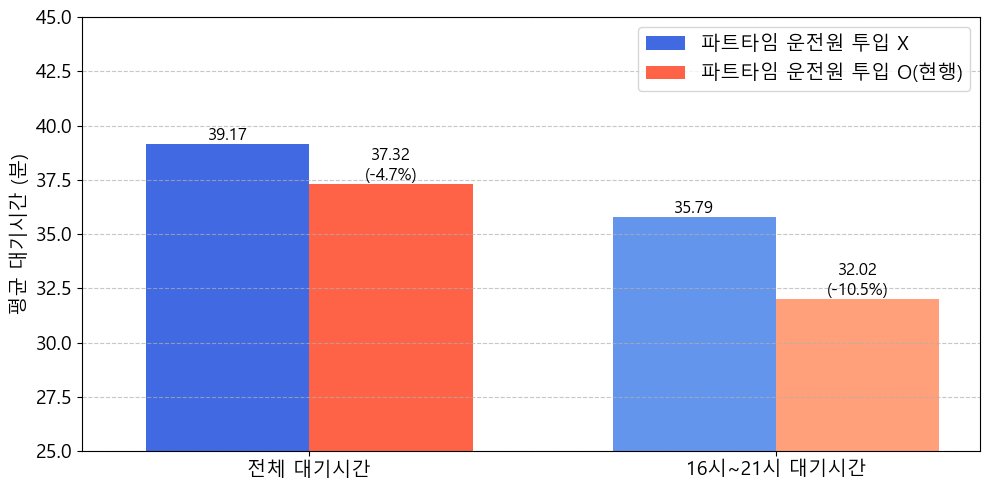

In [357]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 25
y_max = 45

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 12

# 막대 너비 조절 (기본값: 0.8)
bar_width = 0.35

def calculate_waiting_times(file_list, group_name):
    """
    주어진 파일 목록의 데이터를 합쳐 전체 및 16~21시의 평균 대기시간을 계산합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None, None

    print(f"'{group_name}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    # 전체 대기시간 평균 계산
    avg_overall = combined_df['calculated_waiting_minutes'].mean()
    
    # 16시~21시 데이터만 필터링
    combined_df['request_hour'] = combined_df['request_time'].dt.hour
    filtered_df = combined_df[(combined_df['request_hour'] >= 16) & (combined_df['request_hour'] < 21)]
    
    # 필터링된 데이터가 없으면 None 반환
    if filtered_df.empty:
        print(f"경고: '{group_name}' 시나리오에 16시~21시 데이터가 없습니다.")
        avg_filtered = None
    else:
        avg_filtered = filtered_df['calculated_waiting_minutes'].mean()
    
    return avg_overall, avg_filtered

# --- 각 시나리오의 평균 대기시간 계산 ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_overall_baseline, avg_filtered_baseline = calculate_waiting_times(baseline_file_list, 'baseline_with_shift')

universal_file_list = glob.glob(os.path.join(folder_path, 'scheduled_increase_scenario_v1_202506*.csv'))
avg_overall_universal, avg_filtered_universal = calculate_waiting_times(universal_file_list, 'scheduled_increase_scenario_v1')

# --- 그래프용 데이터 정리 ---
if avg_overall_baseline is not None and avg_overall_universal is not None and \
   avg_filtered_baseline is not None and avg_filtered_universal is not None:
    
    # 시각화 데이터 생성
    time_categories = ['전체 대기시간', '16시~21시 대기시간']
    
    # 현행 시나리오의 데이터와 색상
    baseline_data = [avg_overall_baseline, avg_filtered_baseline]
    baseline_colors = ['royalblue', 'cornflowerblue']

    # 파트타임 운전원 투입 시나리오의 데이터와 색상
    universal_data = [avg_overall_universal, avg_filtered_universal]
    universal_colors = ['tomato', 'lightsalmon']

    # --- 그룹 막대 그래프 생성 ---
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(time_categories))
    
    # '현행' 막대 그리기
    bars1 = ax.bar(x - bar_width/2, baseline_data, width=bar_width, color=baseline_colors)
    
    # '파트타임 운전원 투입' 막대 그리기
    bars2 = ax.bar(x + bar_width/2, universal_data, width=bar_width, color=universal_colors)
    
    #ax.set_title('시나리오별 대기시간 비교', fontsize=title_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(time_categories, fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # 각 막대 위에 값 및 변화율 표시
    # '현행' 막대
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=value_fontsize)
    
    # '파트타임 운전원 투입' 막대 (현행 대비 변화율 포함)
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        # 변화율 계산: 파트타임의 각 시간대별 값이 현행의 같은 시간대별 값과 비교됨
        percentage = ((height - baseline_data[i]) / baseline_data[i]) * 100
        text_to_display = f'{height:.2f}\n({percentage:+.1f}%)'
        ax.text(bar.get_x() + bar.get_width()/2., height, text_to_display, ha='center', va='bottom', fontsize=value_fontsize)

    # 범례 생성을 위한 임시 막대 추가 (실제 데이터와 상관 없음)
    ax.bar(0, 0, color='royalblue', label='파트타임 운전원 투입 X')
    ax.bar(0, 0, color='tomato', label='파트타임 운전원 투입 O(현행)')
    ax.legend(fontsize=label_fontsize)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'grouped_waiting_times_comparison_reordered.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"그룹 막대 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없거나 데이터가 부족하여 그래프를 생성할 수 없습니다.")

'baseline_scenario_202506*.csv' 파일들을 분석 중입니다. 총 30개.
'scheduled_increase_scenario_v1_202506*.csv' 파일들을 분석 중입니다. 총 30개.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1469764555.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1469764555.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
시간대별 대기시간 비교 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\hourly_waiting_time_baseline_vs_universal_line.png'에 저장되었습니다.


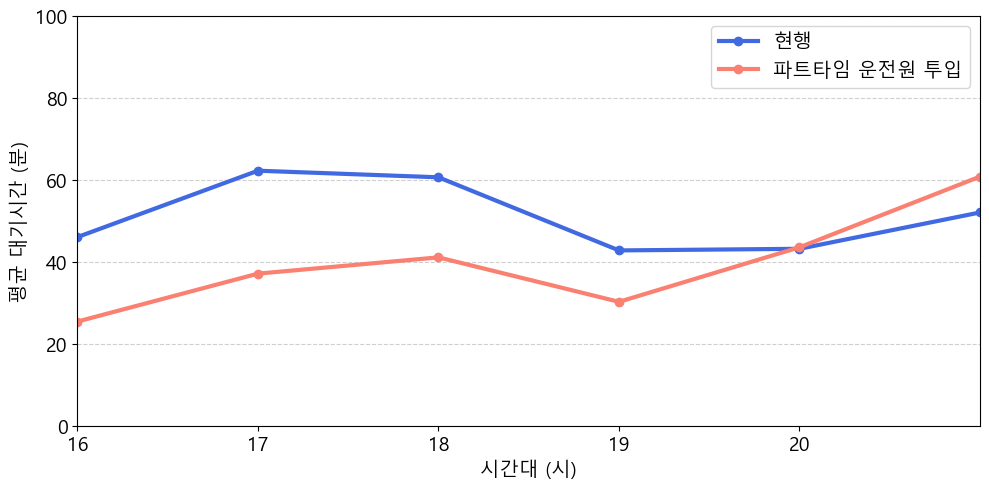

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14
line_thickness = 3 # 선 두께 조절 변수

def get_hourly_average(file_pattern, folder_path):
    """
    주어진 파일 패턴의 모든 파일을 합쳐 시간대별 평균 총 대기시간을 계산합니다.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    if not file_list:
        print(f"오류: '{file_pattern}'에 해당하는 파일이 존재하지 않습니다.")
        return pd.Series(index=range(24), dtype='float64').fillna(0) # 빈 Series 반환

    print(f"'{file_pattern}' 파일들을 분석 중입니다. 총 {len(file_list)}개.")
    
    dfs = []
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    combined_df['total_waiting_minutes'] = combined_df['call_waiting_time'] + combined_df['pickup_waiting_time']
    
    hourly_avg = combined_df.groupby(combined_df['request_time'].dt.hour)['total_waiting_minutes'].mean()
    
    return hourly_avg.reindex(range(24), fill_value=0)

# --- 현행 시나리오와 범용 시나리오의 시간대별 평균 계산 ---
baseline_hourly_avg = get_hourly_average('baseline_scenario_202506*.csv', folder_path)
universal_hourly_avg = get_hourly_average('scheduled_increase_scenario_v1_202506*.csv', folder_path)

# --- 두 시나리오의 데이터를 하나의 데이터프레임으로 합치기 ---
df_comparison = pd.DataFrame({
    '현행': baseline_hourly_avg,
    '범용': universal_hourly_avg
})

# --- 꺾은선 그래프 생성 ---
if not df_comparison.empty:
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ax.plot(df_comparison.index, df_comparison['현행'], marker='o', label='현행', color='royalblue', linewidth=line_thickness)
    ax.plot(df_comparison.index, df_comparison['범용'], marker='o', label='파트타임 운전원 투입', color='salmon', linewidth=line_thickness)

    # --- X축 범위 및 눈금 조절 코드 추가 ---
    # ax 객체를 사용하여 X축 범위 설정
    ax.set_xlim(16, 21)
    # X축 눈금도 범위에 맞춰 설정
    ax.set_xticks(range(16, 21))
    
    ax.set_ylim(0, 100)

    #ax.set_title('현행 vs. 범용 시나리오 시간대별 평균 총 대기시간 비교', fontsize=title_fontsize)
    ax.set_xlabel('시간대 (시)', fontsize=label_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'hourly_waiting_time_baseline_vs_universal_line.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시간대별 대기시간 비교 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

'baseline_with_shift_202506*.csv' 파일들을 분석 중입니다. 총 60개.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2301523778.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1_202506*.csv' 파일들을 분석 중입니다. 총 30개.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2301523778.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
시간대별 대기시간 비교 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\hourly_waiting_time_baseline_vs_universal_line.png'에 저장되었습니다.


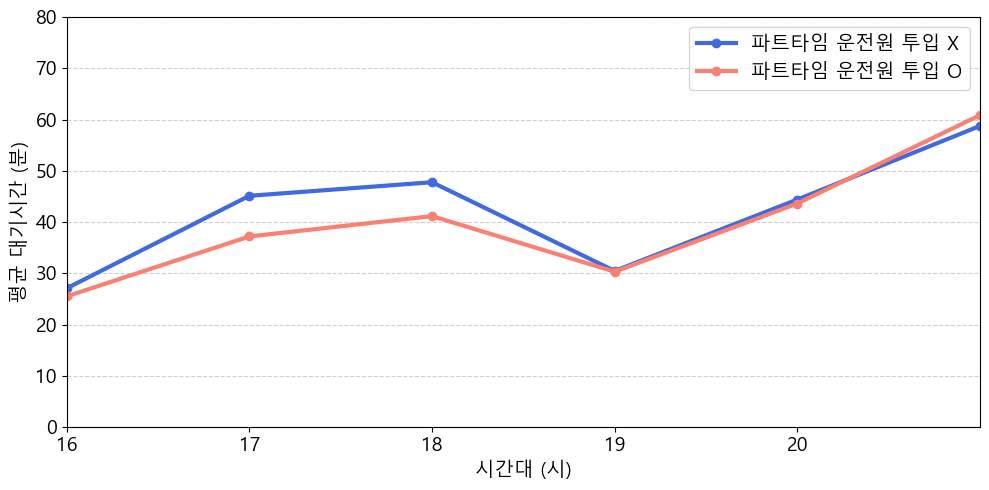

In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14
line_thickness = 3 # 선 두께 조절 변수

def get_hourly_average(file_pattern, folder_path):
    """
    주어진 파일 패턴의 모든 파일을 합쳐 시간대별 평균 총 대기시간을 계산합니다.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    if not file_list:
        print(f"오류: '{file_pattern}'에 해당하는 파일이 존재하지 않습니다.")
        return pd.Series(index=range(24), dtype='float64').fillna(0) # 빈 Series 반환

    print(f"'{file_pattern}' 파일들을 분석 중입니다. 총 {len(file_list)}개.")
    
    dfs = []
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    combined_df['total_waiting_minutes'] = combined_df['call_waiting_time'] + combined_df['pickup_waiting_time']
    
    hourly_avg = combined_df.groupby(combined_df['request_time'].dt.hour)['total_waiting_minutes'].mean()
    
    return hourly_avg.reindex(range(24), fill_value=0)

# --- 현행 시나리오와 범용 시나리오의 시간대별 평균 계산 ---
baseline_hourly_avg = get_hourly_average('baseline_with_shift_202506*.csv', folder_path)
universal_hourly_avg = get_hourly_average('scheduled_increase_scenario_v1_202506*.csv', folder_path)

# --- 두 시나리오의 데이터를 하나의 데이터프레임으로 합치기 ---
df_comparison = pd.DataFrame({
    '현행': baseline_hourly_avg,
    '범용': universal_hourly_avg
})

# --- 꺾은선 그래프 생성 ---
if not df_comparison.empty:
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ax.plot(df_comparison.index, df_comparison['현행'], marker='o', label='파트타임 운전원 투입 X', color='royalblue', linewidth=line_thickness)
    ax.plot(df_comparison.index, df_comparison['범용'], marker='o', label='파트타임 운전원 투입 O', color='salmon', linewidth=line_thickness)

    # --- X축 범위 및 눈금 조절 코드 추가 ---
    # ax 객체를 사용하여 X축 범위 설정
    ax.set_xlim(16, 21)
    # X축 눈금도 범위에 맞춰 설정
    ax.set_xticks(range(16, 21))
    
    ax.set_ylim(0, 80)

    #ax.set_title('현행 vs. 범용 시나리오 시간대별 평균 총 대기시간 비교', fontsize=title_fontsize)
    ax.set_xlabel('시간대 (시)', fontsize=label_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'hourly_waiting_time_baseline_vs_universal_line.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시간대별 대기시간 비교 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

1. [현행 시나리오] Baseline 파일 분석 시작
'baseline_with_shift_202506*.csv' 파일들을 분석 중입니다. 총 60개.

2. [권역 분석 시나리오] Region Analysis 파일 분석 시작
'scheduled_increase_scenario_v1_202506*.csv' 파일들을 분석 중입니다. 총 30개.


비교 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\depot_waiting_time_percentage_change.png'에 성공적으로 저장되었습니다.


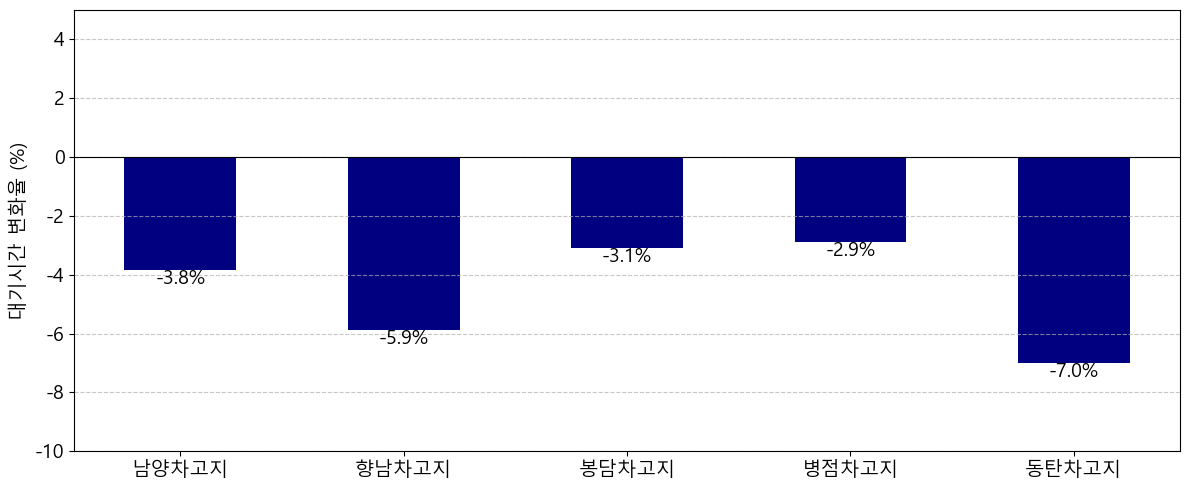

In [351]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14
bar_width = 0.5

# y축 범위 조절 변수 (직접 값 설정)
y_min = -10 # 최소값
y_max = 5 # 최대값

def calculate_waiting_time_by_depot(file_pattern, folder_path):
    """
    지정된 패턴의 파일들을 모두 불러와 pickup_depot_name별 평균 대기시간을 계산합니다.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    if not file_list:
        print(f"경고: '{file_pattern}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None

    print(f"'{file_pattern}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file in file_list:
        try:
            df_temp = pd.read_csv(file, encoding='cp949')
        except UnicodeDecodeError:
            try:
                df_temp = pd.read_csv(file, encoding='utf-8')
            except UnicodeDecodeError:
                df_temp = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df_temp)

    combined_df = pd.concat(dfs, ignore_index=True)

    # 대기시간 계산 (콜 대기시간 + 차량 대기시간)
    if 'call_waiting_time' in combined_df.columns and 'pickup_waiting_time' in combined_df.columns:
        combined_df['total_waiting_minutes'] = combined_df['call_waiting_time'] + combined_df['pickup_waiting_time']
    else:
        print(f"오류: '{file_pattern}' 파일에 'call_waiting_minutes' 또는 'pickup_waiting_minutes' 컬럼이 없습니다.")
        return None
    
    if 'pickup_depot_name' not in combined_df.columns:
        print(f"오류: '{file_pattern}' 파일에 'pickup_depot_name' 컬럼이 없습니다.")
        return None

    avg_waiting_by_depot = combined_df.groupby('pickup_depot_name')['total_waiting_minutes'].mean()
    
    return avg_waiting_by_depot

def plot_percentage_change(baseline_data, region_analysis_data, folder_path, y_min, y_max):
    """
    현행 대비 증감 퍼센트를 막대 그래프로 시각화합니다.
    """
    # 데이터프레임 병합 및 순서 재정렬
    df_plot = pd.DataFrame({
        '현행': baseline_data,
        '권역분석': region_analysis_data
    }).fillna(0)
    
    depot_order = ['남양차고지', '향남차고지', '봉담차고지', '병점차고지', '동탄차고지']
    df_plot = df_plot.reindex(depot_order)
    
    # 현행 대비 변화율 계산
    # 현행 데이터가 0인 경우, 무한대 또는 NaN이 되지 않도록 0으로 처리
    df_plot['변화율 (%)'] = (df_plot['권역분석'] - df_plot['현행']) / df_plot['현행'] * 100
    df_plot.loc[df_plot['현행'] == 0, '변화율 (%)'] = 0
    
    labels = df_plot.index
    x = np.arange(len(labels))
    
    fig, ax = plt.subplots(figsize=(12, 5))
    
    # 막대 색상 설정: 증가(양수)는 초록색, 감소(음수)는 빨간색
    colors = ['firebrick' if val > 0 else 'navy' for val in df_plot['변화율 (%)']]
    bars = ax.bar(x, df_plot['변화율 (%)'], width=bar_width, color=colors)
    
    # 막대 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, 
                f'{height:+.1f}%', # 양수/음수 부호 포함, 소수점 첫째 자리까지
                ha='center', va='bottom' if height >= 0 else 'top', 
                fontsize=value_fontsize)

    # 0% 기준선 추가
    ax.axhline(0, color='black', linewidth=0.8)
    
    # y축 범위 설정
    ax.set_ylim(y_min, y_max)
    
    #ax.set_title('현행 대비 시나리오별 차고지 대기시간 변화율', fontsize=title_fontsize)
    #ax.set_xlabel('차고지명', fontsize=label_fontsize)
    ax.set_ylabel('대기시간 변화율 (%)', fontsize=label_fontsize)

    plt.xticks(x, labels, rotation=0, ha='center', fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    
    plot_path = os.path.join(folder_path, 'depot_waiting_time_percentage_change.png')
    plt.savefig(plot_path)
    print(f"\n비교 그래프가 '{plot_path}'에 성공적으로 저장되었습니다.")


# --- 파일 경로 및 시나리오 정의 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'
baseline_pattern = 'baseline_with_shift_202506*.csv'
region_analysis_pattern = 'scheduled_increase_scenario_v1_202506*.csv'

# --- 결과 계산 ---
print("="*50)
print("1. [현행 시나리오] Baseline 파일 분석 시작")
print("="*50)
baseline_results = calculate_waiting_time_by_depot(baseline_pattern, folder_path)

print("="*50)
print("2. [권역 분석 시나리오] Region Analysis 파일 분석 시작")
print("="*50)
region_analysis_results = calculate_waiting_time_by_depot(region_analysis_pattern, folder_path)

# --- 결과 시각화 ---
if baseline_results is not None and region_analysis_results is not None:
    plot_percentage_change(baseline_results, region_analysis_results, folder_path, y_min, y_max)
else:
    print("\n데이터가 충분하지 않아 그래프를 그릴 수 없습니다.")

'baseline_demand_log' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v6_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v7_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
시나리오별 평균 대기시간을 비교하는 선 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\scenario_waiting_times_line_comparison.png'에 저장되었습니다.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:142: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_overall['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


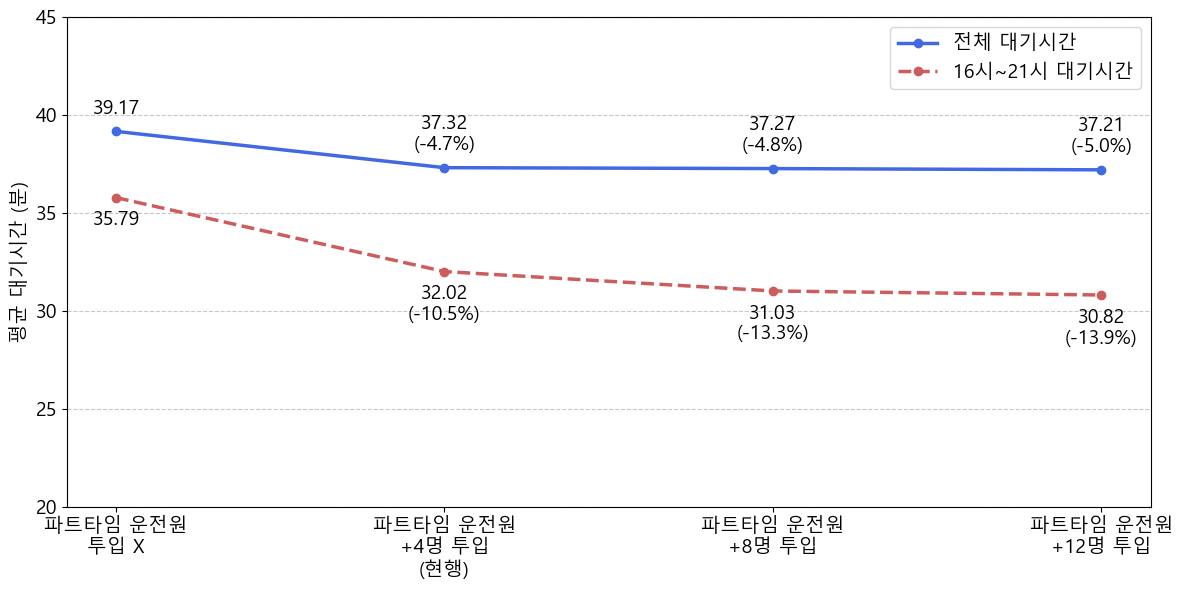

In [529]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 20
y_max = 45

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

# 선 굵기 조절
line_width = 2.5

def get_combined_df(file_list, group_name):
    """
    주어진 파일 목록의 데이터를 합쳐 전처리된 DataFrame을 반환합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None

    print(f"'{group_name}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    return combined_df

def calculate_overall_average(combined_df):
    """
    전체 대기시간의 평균을 계산합니다.
    """
    if combined_df is None:
        return None
    return combined_df['calculated_waiting_minutes'].mean()

def calculate_filtered_average(combined_df):
    """
    16시부터 21시까지의 대기시간 평균을 계산합니다.
    """
    if combined_df is None:
        return None
    
    combined_df['request_hour'] = combined_df['request_time'].dt.hour
    filtered_df = combined_df[(combined_df['request_hour'] >= 16) & (combined_df['request_hour'] < 21)]
    
    if filtered_df.empty:
        print("경고: 16시~21시 데이터가 없어 평균을 계산할 수 없습니다.")
        return None
    
    return filtered_df['calculated_waiting_minutes'].mean()


# --- 각 시나리오별 평균 대기시간을 저장할 리스트 ---
overall_data = []
filtered_data = []

# --- 1. 현행(baseline) 시나리오 평균 대기시간 계산 ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
baseline_df = get_combined_df(baseline_file_list, 'baseline_demand_log')

avg_overall_baseline = calculate_overall_average(baseline_df)
avg_filtered_baseline = calculate_filtered_average(baseline_df)

if avg_overall_baseline is not None:
    overall_data.append({'scenario_name': '파트타임 운전원\n투입 X', 'average_time': avg_overall_baseline})
    filtered_data.append({'scenario_name': '파트타임 운전원\n투입 X', 'average_time': avg_filtered_baseline})

# --- 2. 추가 차량수 시나리오별 평균 대기시간 계산 ---
for n_additional in (1, 6, 7):
    file_pattern = f'scheduled_increase_scenario_v{n_additional}_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    additional_df = get_combined_df(additional_file_list, file_pattern)
    
    avg_overall_additional = calculate_overall_average(additional_df)
    avg_filtered_additional = calculate_filtered_average(additional_df)
    
    if n_additional == 1:
        n_additional_alpha = 4
    if n_additional == 6:
        n_additional_alpha = 8
    if n_additional == 7:
        n_additional_alpha = 12
        
    if avg_overall_additional is not None:
        if n_additional == 1:
            scenario_name = f'파트타임 운전원\n+{n_additional_alpha}명 투입\n(현행)'
        else:
            scenario_name = f'파트타임 운전원\n+{n_additional_alpha}명 투입'
        
        overall_data.append({'scenario_name': scenario_name, 'average_time': avg_overall_additional})
        filtered_data.append({'scenario_name': scenario_name, 'average_time': avg_filtered_additional})

# --- 시나리오별 평균 대기시간 비교 그래프 생성 (선 그래프) ---
if overall_data:
    df_overall = pd.DataFrame(overall_data)
    df_filtered = pd.DataFrame(filtered_data)
    
    # 현행 시나리오의 전체 및 필터링된 평균 대기시간을 기준으로 감소율 계산
    baseline_overall_time = df_overall[df_overall['scenario_name'] == '파트타임 운전원\n투입 X']['average_time'].iloc[0]
    baseline_filtered_time = df_filtered[df_filtered['scenario_name'] == '파트타임 운전원\n투입 X']['average_time'].iloc[0]

    fig, ax = plt.subplots(figsize=(12, 6))
    
    # 전체 대기시간 선 그래프 그리기
    ax.plot(df_overall['scenario_name'], df_overall['average_time'], marker='o', linestyle='-', linewidth=line_width, color='royalblue', label='전체 대기시간')
    
    # 16~21시 대기시간 선 그래프 그리기
    ax.plot(df_filtered['scenario_name'], df_filtered['average_time'], marker='o', linestyle='--', linewidth=line_width, color='indianred', label='16시~21시 대기시간')
    
    #ax.set_title('시나리오별 평균 대기시간 비교', fontsize=title_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    
    ax.set_xticklabels(df_overall['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    ax.legend(fontsize=label_fontsize)

    # y축 범위 설정
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # 각 데이터 포인트 위에 값 및 감소율 표시
    y_offset_overall = 0.7  # 전체 대기시간 텍스트를 위로 올릴 오프셋
    y_offset_filtered = -0.7 # 16~21시 대기시간 텍스트를 아래로 내릴 오프셋

    for index, row in df_overall.iterrows():
        text_overall = f'{row["average_time"]:.2f}'
        if row['scenario_name'] != '파트타임 운전원\n투입 X':
            decrease_rate = ((baseline_overall_time - row['average_time']) / baseline_overall_time) * 100
            text_overall += f'\n(-{decrease_rate:.1f}%)'
        
        ax.text(index, row['average_time'] + y_offset_overall, text_overall, ha='center', va='bottom', fontsize=value_fontsize)

    for index, row in df_filtered.iterrows():
        text_filtered = f'{row["average_time"]:.2f}'
        if row['scenario_name'] != '파트타임 운전원\n투입 X':
            decrease_rate = ((baseline_filtered_time - row['average_time']) / baseline_filtered_time) * 100
            text_filtered += f'\n(-{decrease_rate:.1f}%)'
        
        ax.text(index, row['average_time'] + y_offset_filtered, text_filtered, ha='center', va='top', fontsize=value_fontsize)

    plt.tight_layout()
    
    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'scenario_waiting_times_line_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시나리오별 평균 대기시간을 비교하는 선 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

'baseline_with_shift' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2527933515.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2527933515.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2527933515.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2527933515.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
그룹 막대 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\grouped_waiting_times_comparison_reordered.png'에 저장되었습니다.


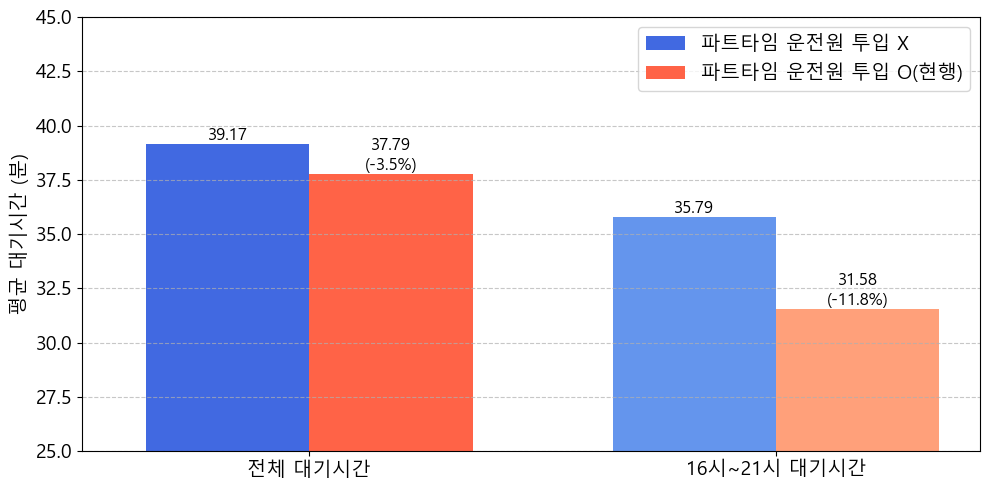

In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 25
y_max = 45

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 12

# 막대 너비 조절 (기본값: 0.8)
bar_width = 0.35

def calculate_waiting_times(file_list, group_name):
    """
    주어진 파일 목록의 데이터를 합쳐 전체 및 16~21시의 평균 대기시간을 계산합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None, None

    print(f"'{group_name}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    # 전체 대기시간 평균 계산
    avg_overall = combined_df['calculated_waiting_minutes'].mean()
    
    # 16시~21시 데이터만 필터링
    combined_df['request_hour'] = combined_df['request_time'].dt.hour
    filtered_df = combined_df[(combined_df['request_hour'] >= 16) & (combined_df['request_hour'] < 21)]
    
    # 필터링된 데이터가 없으면 None 반환
    if filtered_df.empty:
        print(f"경고: '{group_name}' 시나리오에 16시~21시 데이터가 없습니다.")
        avg_filtered = None
    else:
        avg_filtered = filtered_df['calculated_waiting_minutes'].mean()
    
    return avg_overall, avg_filtered

# --- 각 시나리오의 평균 대기시간 계산 ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_overall_baseline, avg_filtered_baseline = calculate_waiting_times(baseline_file_list, 'baseline_with_shift')

universal_file_list = glob.glob(os.path.join(folder_path, 'scheduled_increase_scenario_v4_202506*.csv'))
avg_overall_universal, avg_filtered_universal = calculate_waiting_times(universal_file_list, 'scheduled_increase_scenario_v1')

# --- 그래프용 데이터 정리 ---
if avg_overall_baseline is not None and avg_overall_universal is not None and \
   avg_filtered_baseline is not None and avg_filtered_universal is not None:
    
    # 시각화 데이터 생성
    time_categories = ['전체 대기시간', '16시~21시 대기시간']
    
    # 현행 시나리오의 데이터와 색상
    baseline_data = [avg_overall_baseline, avg_filtered_baseline]
    baseline_colors = ['royalblue', 'cornflowerblue']

    # 파트타임 운전원 투입 시나리오의 데이터와 색상
    universal_data = [avg_overall_universal, avg_filtered_universal]
    universal_colors = ['tomato', 'lightsalmon']

    # --- 그룹 막대 그래프 생성 ---
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(time_categories))
    
    # '현행' 막대 그리기
    bars1 = ax.bar(x - bar_width/2, baseline_data, width=bar_width, color=baseline_colors)
    
    # '파트타임 운전원 투입' 막대 그리기
    bars2 = ax.bar(x + bar_width/2, universal_data, width=bar_width, color=universal_colors)
    
    #ax.set_title('시나리오별 대기시간 비교', fontsize=title_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(time_categories, fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # 각 막대 위에 값 및 변화율 표시
    # '현행' 막대
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=value_fontsize)
    
    # '파트타임 운전원 투입' 막대 (현행 대비 변화율 포함)
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        # 변화율 계산: 파트타임의 각 시간대별 값이 현행의 같은 시간대별 값과 비교됨
        percentage = ((height - baseline_data[i]) / baseline_data[i]) * 100
        text_to_display = f'{height:.2f}\n({percentage:+.1f}%)'
        ax.text(bar.get_x() + bar.get_width()/2., height, text_to_display, ha='center', va='bottom', fontsize=value_fontsize)

    # 범례 생성을 위한 임시 막대 추가 (실제 데이터와 상관 없음)
    ax.bar(0, 0, color='royalblue', label='파트타임 운전원 투입 X')
    ax.bar(0, 0, color='tomato', label='파트타임 운전원 투입 O(현행)')
    ax.legend(fontsize=label_fontsize)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'grouped_waiting_times_comparison_reordered.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"그룹 막대 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없거나 데이터가 부족하여 그래프를 생성할 수 없습니다.")

'baseline_demand_log' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v4_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v10_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v11_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:142: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_overall['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)



------------------------------------------------------
시나리오별 평균 대기시간을 비교하는 선 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\scenario_waiting_times_line_comparison.png'에 저장되었습니다.


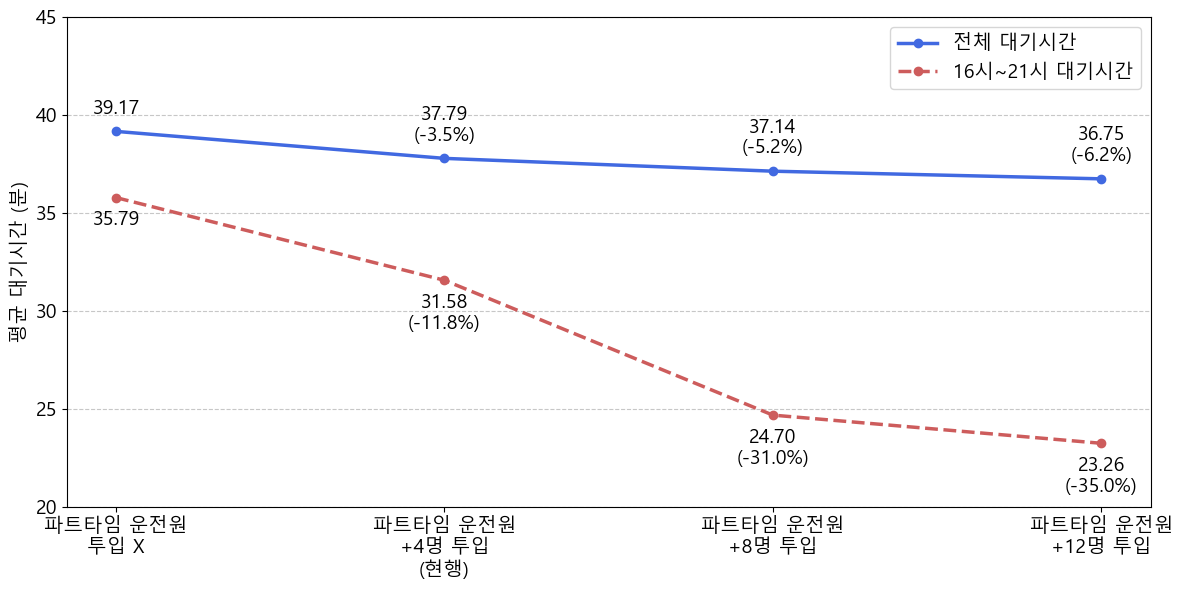

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 20
y_max = 45

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

# 선 굵기 조절
line_width = 2.5

def get_combined_df(file_list, group_name):
    """
    주어진 파일 목록의 데이터를 합쳐 전처리된 DataFrame을 반환합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None

    print(f"'{group_name}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    return combined_df

def calculate_overall_average(combined_df):
    """
    전체 대기시간의 평균을 계산합니다.
    """
    if combined_df is None:
        return None
    return combined_df['calculated_waiting_minutes'].mean()

def calculate_filtered_average(combined_df):
    """
    16시부터 21시까지의 대기시간 평균을 계산합니다.
    """
    if combined_df is None:
        return None
    
    combined_df['request_hour'] = combined_df['request_time'].dt.hour
    filtered_df = combined_df[(combined_df['request_hour'] >= 16) & (combined_df['request_hour'] < 21)]
    
    if filtered_df.empty:
        print("경고: 16시~21시 데이터가 없어 평균을 계산할 수 없습니다.")
        return None
    
    return filtered_df['calculated_waiting_minutes'].mean()


# --- 각 시나리오별 평균 대기시간을 저장할 리스트 ---
overall_data = []
filtered_data = []

# --- 1. 현행(baseline) 시나리오 평균 대기시간 계산 ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
baseline_df = get_combined_df(baseline_file_list, 'baseline_demand_log')

avg_overall_baseline = calculate_overall_average(baseline_df)
avg_filtered_baseline = calculate_filtered_average(baseline_df)

if avg_overall_baseline is not None:
    overall_data.append({'scenario_name': '파트타임 운전원\n투입 X', 'average_time': avg_overall_baseline})
    filtered_data.append({'scenario_name': '파트타임 운전원\n투입 X', 'average_time': avg_filtered_baseline})

# --- 2. 추가 차량수 시나리오별 평균 대기시간 계산 ---
for n_additional in (4,10,11):
    file_pattern = f'scheduled_increase_scenario_v{n_additional}_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    additional_df = get_combined_df(additional_file_list, file_pattern)
    
    avg_overall_additional = calculate_overall_average(additional_df)
    avg_filtered_additional = calculate_filtered_average(additional_df)
    
    if n_additional == 4:
        n_additional_alpha = 4
    if n_additional == 10:
        n_additional_alpha = 8
    if n_additional == 11:
        n_additional_alpha = 12
        
    if avg_overall_additional is not None:
        if n_additional == 4:
            scenario_name = f'파트타임 운전원\n+{n_additional_alpha}명 투입\n(현행)'
        else:
            scenario_name = f'파트타임 운전원\n+{n_additional_alpha}명 투입'
        
        overall_data.append({'scenario_name': scenario_name, 'average_time': avg_overall_additional})
        filtered_data.append({'scenario_name': scenario_name, 'average_time': avg_filtered_additional})

# --- 시나리오별 평균 대기시간 비교 그래프 생성 (선 그래프) ---
if overall_data:
    df_overall = pd.DataFrame(overall_data)
    df_filtered = pd.DataFrame(filtered_data)
    
    # 현행 시나리오의 전체 및 필터링된 평균 대기시간을 기준으로 감소율 계산
    baseline_overall_time = df_overall[df_overall['scenario_name'] == '파트타임 운전원\n투입 X']['average_time'].iloc[0]
    baseline_filtered_time = df_filtered[df_filtered['scenario_name'] == '파트타임 운전원\n투입 X']['average_time'].iloc[0]

    fig, ax = plt.subplots(figsize=(12, 6))
    
    # 전체 대기시간 선 그래프 그리기
    ax.plot(df_overall['scenario_name'], df_overall['average_time'], marker='o', linestyle='-', linewidth=line_width, color='royalblue', label='전체 대기시간')
    
    # 16~21시 대기시간 선 그래프 그리기
    ax.plot(df_filtered['scenario_name'], df_filtered['average_time'], marker='o', linestyle='--', linewidth=line_width, color='indianred', label='16시~21시 대기시간')
    
    #ax.set_title('시나리오별 평균 대기시간 비교', fontsize=title_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    
    ax.set_xticklabels(df_overall['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    ax.legend(fontsize=label_fontsize)

    # y축 범위 설정
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # 각 데이터 포인트 위에 값 및 감소율 표시
    y_offset_overall = 0.7  # 전체 대기시간 텍스트를 위로 올릴 오프셋
    y_offset_filtered = -0.7 # 16~21시 대기시간 텍스트를 아래로 내릴 오프셋

    for index, row in df_overall.iterrows():
        text_overall = f'{row["average_time"]:.2f}'
        if row['scenario_name'] != '파트타임 운전원\n투입 X':
            decrease_rate = ((baseline_overall_time - row['average_time']) / baseline_overall_time) * 100
            text_overall += f'\n(-{decrease_rate:.1f}%)'
        
        ax.text(index, row['average_time'] + y_offset_overall, text_overall, ha='center', va='bottom', fontsize=value_fontsize)

    for index, row in df_filtered.iterrows():
        text_filtered = f'{row["average_time"]:.2f}'
        if row['scenario_name'] != '파트타임 운전원\n투입 X':
            decrease_rate = ((baseline_filtered_time - row['average_time']) / baseline_filtered_time) * 100
            text_filtered += f'\n(-{decrease_rate:.1f}%)'
        
        ax.text(index, row['average_time'] + y_offset_filtered, text_filtered, ha='center', va='top', fontsize=value_fontsize)

    plt.tight_layout()
    
    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'scenario_waiting_times_line_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시나리오별 평균 대기시간을 비교하는 선 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

'baseline_demand_log' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v31_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v32_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v33_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v34_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v35_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v36_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v37_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v38_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v39_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
시나리오별 평균 대기시간을 비교하는 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\scenario_waiting_times_comparison.png'에 저장되었습니다.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:118: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


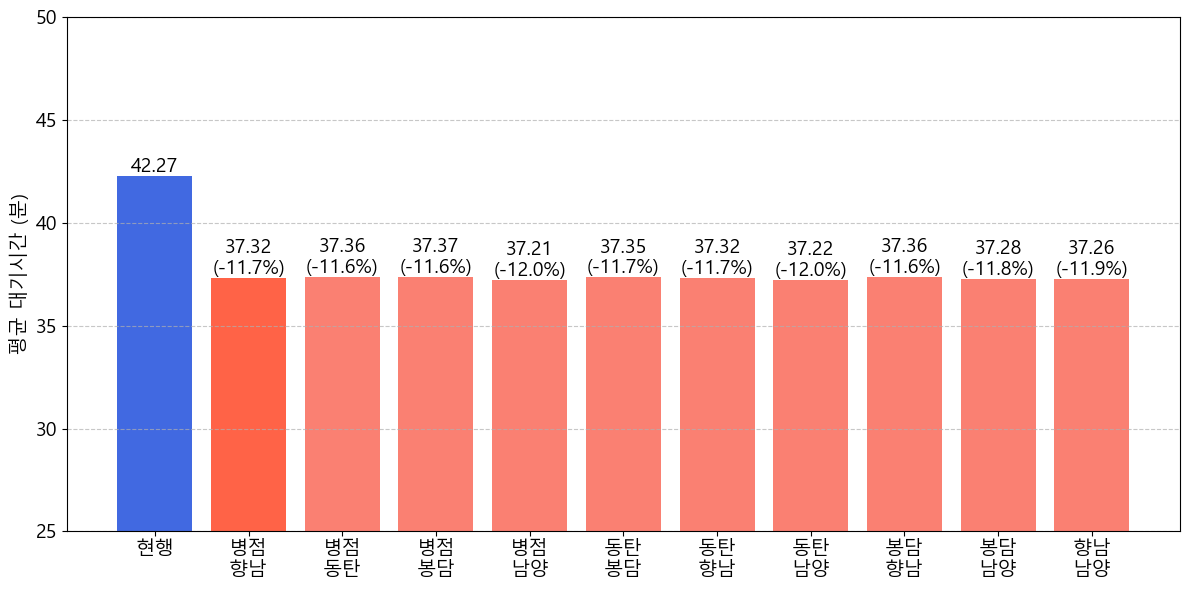

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 25
y_max = 50

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name):
    """
    주어진 파일 목록의 데이터를 합쳐 평균 대기시간을 계산합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None

    print(f"'{group_name}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- 각 시나리오별 평균 대기시간을 저장할 리스트 ---
scenario_data = []

# --- 1. 현행(baseline) 시나리오 평균 대기시간 계산 ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_scenario_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': '현행', 'average_time': avg_baseline})

# --- 2. 추가 차량수 시나리오별 평균 대기시간 계산 ---
# x축에 표시할 라벨과 파일명에 포함된 숫자를 딕셔너리로 매핑
scenario_labels = {
    1: '병점\n향남',
    31: '병점\n동탄',
    32: '병점\n봉담',
    33: '병점\n남양',
    34: '동탄\n봉담',
    35: '동탄\n향남',
    36: '동탄\n남양',
    37: '봉담\n향남',
    38: '봉담\n남양',
    39: '향남\n남양'
}

for n_additional, label in scenario_labels.items():
    
    # 파일 패턴 생성
    file_pattern = f'scheduled_increase_scenario_v{n_additional}_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # 평균 대기시간 계산
    avg_additional = calculate_group_average(additional_file_list, file_pattern)
    
    if avg_additional is not None:
        scenario_data.append({'scenario_name': label, 'average_time': avg_additional})

# --- 시나리오별 평균 대기시간 비교 그래프 생성 ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # 현행 시나리오의 평균 대기시간을 기준으로 감소율 계산
    baseline_time = df_results[df_results['scenario_name'] == '현행']['average_time'].iloc[0]
    df_results['decrease_rate'] = ((baseline_time - df_results['average_time']) / baseline_time) * 100

    # 각 시나리오별 색상 지정
    colors = []
    for name in df_results['scenario_name']:
        if name == '현행':
            colors.append('royalblue')
        elif name == '병점\n향남':
            colors.append('tomato') # v1 시나리오에 해당하는 막대를 초록색으로 변경
        else:
            colors.append('salmon')

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('시나리오별 평균 대기시간 비교', fontsize=title_fontsize)
    #ax.set_xlabel('시나리오', fontsize=label_fontsize) # x축 라벨을 '시나리오'로 변경
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    
    # x축 라벨 수정 (자동으로 지정된 이름 사용)
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # y축 범위 설정
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # 각 막대 위에 값 및 감소율 표시
    for bar in bars:
        height = bar.get_height()
        scenario_name = df_results.loc[df_results['average_time'] == height, 'scenario_name'].iloc[0]
        
        # 현행 시나리오는 감소율을 표시하지 않음
        if scenario_name == '현행':
            text = f'{height:.2f}'
        else:
            decrease_rate = df_results.loc[df_results['average_time'] == height, 'decrease_rate'].iloc[0]
            text = f'{height:.2f}\n(-{decrease_rate:.1f}%)'
        
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'scenario_waiting_times_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시나리오별 평균 대기시간을 비교하는 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

'baseline_demand_log' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v31_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v32_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v33_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v34_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v35_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v36_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v37_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v38_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v39_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:118: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)



------------------------------------------------------
시나리오별 평균 대기시간을 비교하는 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\scenario_waiting_times_comparison.png'에 저장되었습니다.


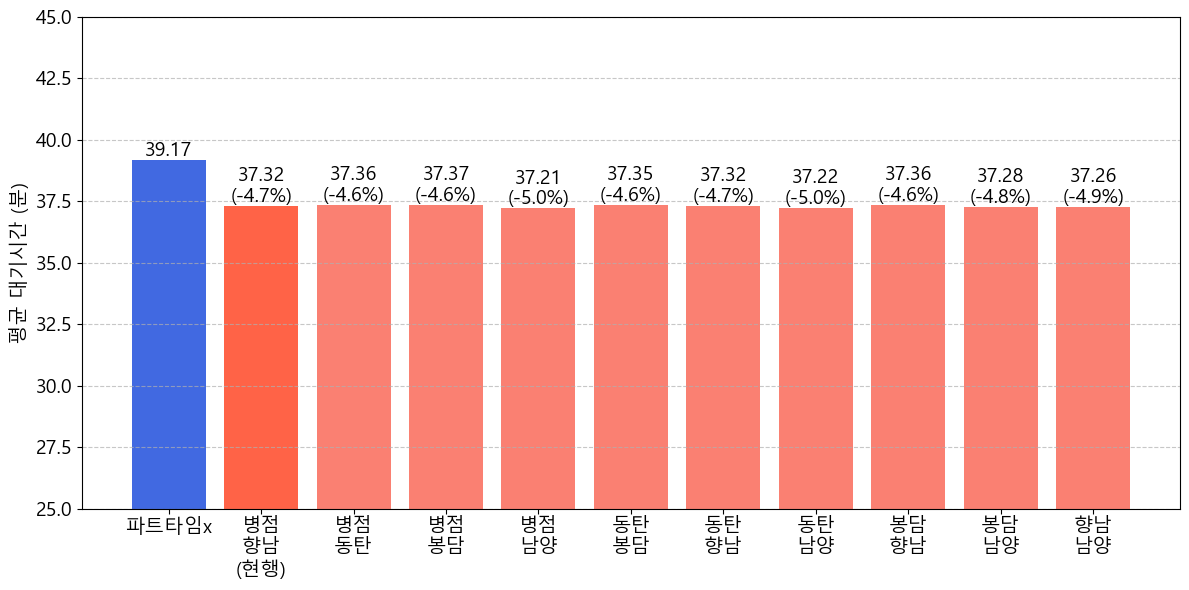

In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 25
y_max = 45

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name):
    """
    주어진 파일 목록의 데이터를 합쳐 평균 대기시간을 계산합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None

    print(f"'{group_name}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- 각 시나리오별 평균 대기시간을 저장할 리스트 ---
scenario_data = []

# --- 1. 현행(baseline) 시나리오 평균 대기시간 계산 ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': '파트타임x', 'average_time': avg_baseline})

# --- 2. 추가 차량수 시나리오별 평균 대기시간 계산 ---
# x축에 표시할 라벨과 파일명에 포함된 숫자를 딕셔너리로 매핑
scenario_labels = {
    1: '병점\n향남\n(현행)',
    31: '병점\n동탄',
    32: '병점\n봉담',
    33: '병점\n남양',
    34: '동탄\n봉담',
    35: '동탄\n향남',
    36: '동탄\n남양',
    37: '봉담\n향남',
    38: '봉담\n남양',
    39: '향남\n남양'
}

for n_additional, label in scenario_labels.items():
    
    # 파일 패턴 생성
    file_pattern = f'scheduled_increase_scenario_v{n_additional}_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # 평균 대기시간 계산
    avg_additional = calculate_group_average(additional_file_list, file_pattern)
    
    if avg_additional is not None:
        scenario_data.append({'scenario_name': label, 'average_time': avg_additional})

# --- 시나리오별 평균 대기시간 비교 그래프 생성 ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # 현행 시나리오의 평균 대기시간을 기준으로 감소율 계산
    baseline_time = df_results[df_results['scenario_name'] == '파트타임x']['average_time'].iloc[0]
    df_results['decrease_rate'] = ((baseline_time - df_results['average_time']) / baseline_time) * 100

    # 각 시나리오별 색상 지정
    colors = []
    for name in df_results['scenario_name']:
        if name == '파트타임x':
            colors.append('royalblue')
        elif name == '병점\n향남\n(현행)':
            colors.append('tomato') # v1 시나리오에 해당하는 막대를 초록색으로 변경
        else:
            colors.append('salmon')

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('시나리오별 평균 대기시간 비교', fontsize=title_fontsize)
    #ax.set_xlabel('시나리오', fontsize=label_fontsize) # x축 라벨을 '시나리오'로 변경
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    
    # x축 라벨 수정 (자동으로 지정된 이름 사용)
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # y축 범위 설정
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # 각 막대 위에 값 및 감소율 표시
    for bar in bars:
        height = bar.get_height()
        scenario_name = df_results.loc[df_results['average_time'] == height, 'scenario_name'].iloc[0]
        
        # 현행 시나리오는 감소율을 표시하지 않음
        if scenario_name == '파트타임x':
            text = f'{height:.2f}'
        else:
            decrease_rate = df_results.loc[df_results['average_time'] == height, 'decrease_rate'].iloc[0]
            text = f'{height:.2f}\n(-{decrease_rate:.1f}%)'
        
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'scenario_waiting_times_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시나리오별 평균 대기시간을 비교하는 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

'baseline_demand_log' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v41_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v42_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v43_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v44_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v45_202506*.csv' 파일들을 분석 중입니다. 총 30개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
시나리오별 평균 대기시간을 비교하는 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\scenario_waiting_times_comparison.png'에 저장되었습니다.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


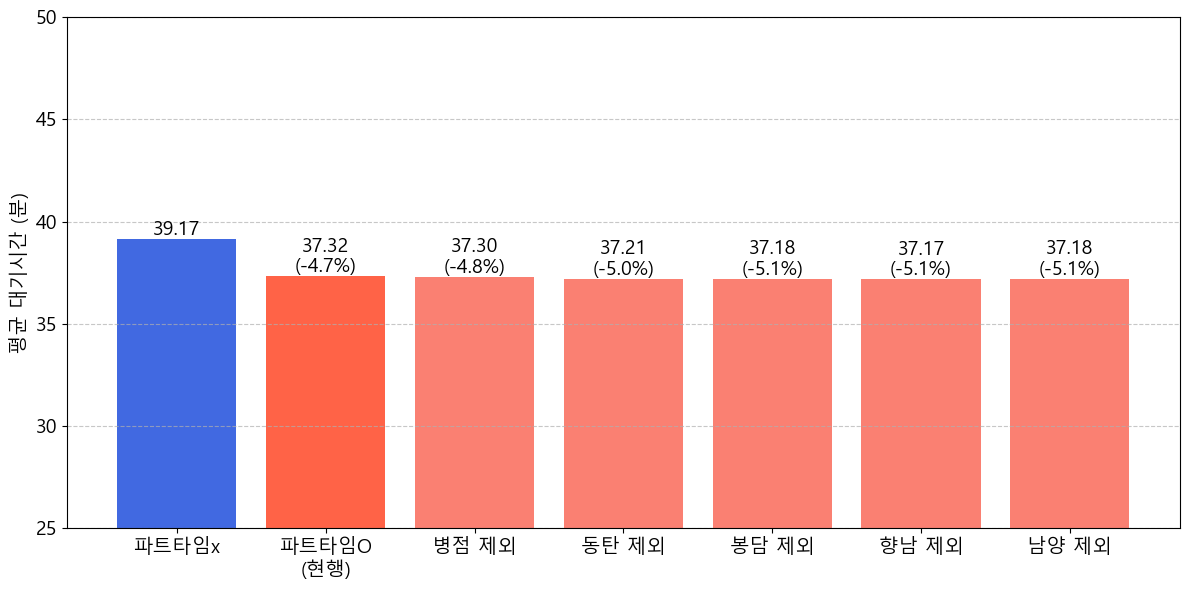

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 25
y_max = 50

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name):
    """
    주어진 파일 목록의 데이터를 합쳐 평균 대기시간을 계산합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None

    print(f"'{group_name}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- 각 시나리오별 평균 대기시간을 저장할 리스트 ---
scenario_data = []

# --- 1. 현행(baseline) 시나리오 평균 대기시간 계산 ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': '파트타임x', 'average_time': avg_baseline})

# --- 2. 추가 차량수 시나리오별 평균 대기시간 계산 ---
# x축에 표시할 라벨과 파일명에 포함된 숫자를 딕셔너리로 매핑
scenario_labels = {
    1: '파트타임O\n(현행)',
    41: '병점 제외',
    42: '동탄 제외',
    43: '봉담 제외',
    44: '향남 제외',
    45: '남양 제외'
}

for n_additional, label in scenario_labels.items():
    
    # 파일 패턴 생성
    file_pattern = f'scheduled_increase_scenario_v{n_additional}_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # 평균 대기시간 계산
    avg_additional = calculate_group_average(additional_file_list, file_pattern)
    
    if avg_additional is not None:
        scenario_data.append({'scenario_name': label, 'average_time': avg_additional})

# --- 시나리오별 평균 대기시간 비교 그래프 생성 ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # 현행 시나리오의 평균 대기시간을 기준으로 감소율 계산
    baseline_time = df_results[df_results['scenario_name'] == '파트타임x']['average_time'].iloc[0]
    df_results['decrease_rate'] = ((baseline_time - df_results['average_time']) / baseline_time) * 100

    # 각 시나리오별 색상 지정
    colors = []
    for name in df_results['scenario_name']:
        if name == '파트타임x':
            colors.append('royalblue')
        elif name == '파트타임O\n(현행)':
            colors.append('tomato') # v1 시나리오에 해당하는 막대를 초록색으로 변경
        else:
            colors.append('salmon')

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('시나리오별 평균 대기시간 비교', fontsize=title_fontsize)
    #ax.set_xlabel('시나리오', fontsize=label_fontsize) # x축 라벨을 '시나리오'로 변경
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    
    # x축 라벨 수정 (자동으로 지정된 이름 사용)
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # y축 범위 설정
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # 각 막대 위에 값 및 감소율 표시
    for bar in bars:
        height = bar.get_height()
        scenario_name = df_results.loc[df_results['average_time'] == height, 'scenario_name'].iloc[0]
        
        # 현행 시나리오는 감소율을 표시하지 않음
        if scenario_name == '파트타임x':
            text = f'{height:.2f}'
        else:
            decrease_rate = df_results.loc[df_results['average_time'] == height, 'decrease_rate'].iloc[0]
            text = f'{height:.2f}\n(-{decrease_rate:.1f}%)'
        
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'scenario_waiting_times_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시나리오별 평균 대기시간을 비교하는 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

데이터 로딩 및 평균 대기시간 계산 중...


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1932196653.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['waiting_time'] = (pd.to_datetime(combined_df['pickup_time']) - pd.to_datetime(combined_df['request_time'])).dt.total_seconds() / 60
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1932196653.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['waiting_time'] = (pd.to_datetime(combined_df['pickup_time']) - pd.to_datetime(combined_df['request_time'])).dt.total_seconds() / 60


현행 시나리오: 관내 평균 대기시간 = 27.75분, 관외 평균 대기시간 = 70.24분


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1932196653.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['waiting_time'] = (pd.to_datetime(combined_df['pickup_time']) - pd.to_datetime(combined_df['request_time'])).dt.total_seconds() / 60
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1932196653.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['waiting_time'] = (pd.to_datetime(combined_df['pickup_time']) - pd.to_datetime(combined_df['request_time'])).dt.total_seconds() / 60


관내/관외 구분 x 시나리오: 관내 평균 대기시간 = 35.03분, 관외 평균 대기시간 = 38.10분

------------------------------------------------------
관내/관외 대기시간 비교 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\baseline_vs_universal_inout_comparison.png'에 저장되었습니다.


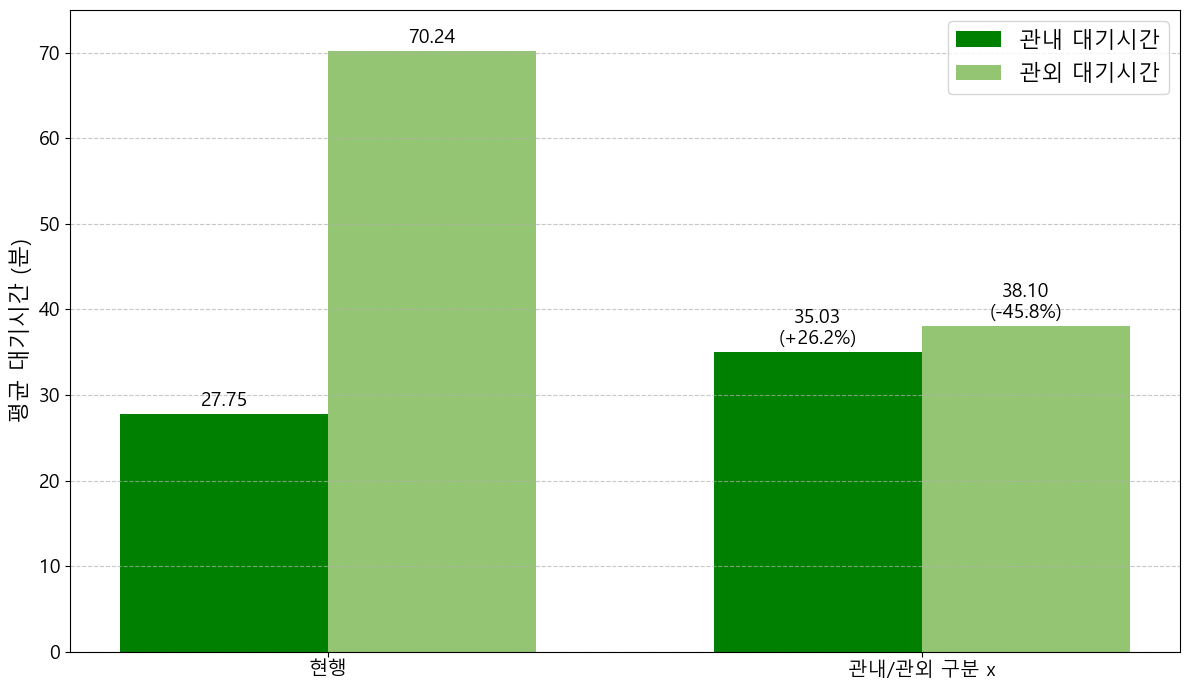

In [397]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import re

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
y_min = 0
y_max = 75
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14
bar_width = 0.35

# ==========================================================
# 📊 실제 데이터 기반으로 대기시간 평균 계산
# ==========================================================
print("데이터 로딩 및 평균 대기시간 계산 중...")

def calculate_waiting_time(file_list, scenario_name):
    """
    주어진 파일 목록을 기반으로 관내/관외 평균 대기시간을 계산합니다.
    """
    if not file_list:
        print(f"오류: '{scenario_name}' 시나리오에 해당하는 파일을 찾을 수 없습니다.")
        return None, None
    
    try:
        df_list = [pd.read_csv(f, encoding='utf-8') for f in file_list]
        combined_df = pd.concat(df_list, ignore_index=True)
        
        # 관내/관외 구분 로직: 'pickup_depot_name'과 'dropoff_depot_name'을 사용
        combined_df['new_in_out'] = '관외'
        combined_df.loc[(combined_df['pickup_depot_name'].notna()) & (combined_df['dropoff_depot_name'].notna()), 'new_in_out'] = '관내'
        
        # 대기시간 계산 (범용 시나리오와 동일한 방식)
        combined_df['waiting_time'] = (pd.to_datetime(combined_df['pickup_time']) - pd.to_datetime(combined_df['request_time'])).dt.total_seconds() / 60
        
        avg_in = combined_df[combined_df['new_in_out'] == '관내']['waiting_time'].mean()
        avg_out = combined_df[combined_df['new_in_out'] == '관외']['waiting_time'].mean()
        
        print(f"{scenario_name} 시나리오: 관내 평균 대기시간 = {avg_in:.2f}분, 관외 평균 대기시간 = {avg_out:.2f}분")
        return avg_in, avg_out

    except Exception as e:
        print(f"'{scenario_name}' 시나리오 파일 처리 중 오류 발생: {e}")
        return None, None

# --- 현행 시나리오 대기시간 계산 (범용과 동일한 방식 적용) ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline_in, avg_baseline_out = calculate_waiting_time(baseline_file_list, '현행')

# --- 범용 시나리오 대기시간 계산 ---
universal_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_forceBOTH_202506*.csv'))
avg_universal_in, avg_universal_out = calculate_waiting_time(universal_file_list, '관내/관외 구분 x')
    
# ==========================================================

# --- 1. 그래프 데이터 준비 ---
scenario_data_list = []

if avg_baseline_in is not None and avg_baseline_out is not None:
    scenario_data_list.append({'scenario_name': '현행', '관내': avg_baseline_in, '관외': avg_baseline_out})

if avg_universal_in is not None and avg_universal_out is not None:
    scenario_data_list.append({'scenario_name': '관내/관외 구분 x', '관내': avg_universal_in, '관외': avg_universal_out})

# --- 2. 막대 그래프 생성 ---
if scenario_data_list:
    df_results = pd.DataFrame(scenario_data_list)
    x = np.arange(len(df_results))
    fig, ax = plt.subplots(figsize=(12, 7))
    
    rects1 = ax.bar(x - bar_width/2, df_results['관내'], bar_width, label='관내 대기시간', color='green')
    rects2 = ax.bar(x + bar_width/2, df_results['관외'], bar_width, label='관외 대기시간', color='#93C572')

    #ax.set_title('현행 vs. 범용 시나리오별 관내/관외 평균 대기시간 비교', fontsize=title_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    def autolabel_with_percentage(rects, scenario_type):
        for i, rect in enumerate(rects):
            height = rect.get_height()
            text_to_display = f'{height:.2f}'

            if '현행' in df_results['scenario_name'].values:
                baseline_row = df_results[df_results['scenario_name'] == '현행'].iloc[0]
                
                if scenario_type == '관내' and df_results['scenario_name'].iloc[i] != '현행':
                    baseline_val = baseline_row['관내']
                    if baseline_val != 0:
                        percentage_change = ((height - baseline_val) / baseline_val) * 100
                        text_to_display += f'\n({percentage_change:+.1f}%)'

                elif scenario_type == '관외' and df_results['scenario_name'].iloc[i] != '현행':
                    baseline_val = baseline_row['관외']
                    if baseline_val != 0:
                        percentage_change = ((height - baseline_val) / baseline_val) * 100
                        text_to_display += f'\n({percentage_change:+.1f}%)'
            
            ax.annotate(text_to_display,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), 
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=value_fontsize)

    autolabel_with_percentage(rects1, '관내')
    autolabel_with_percentage(rects2, '관외')
    
    ax.legend(fontsize=label_fontsize)
    plt.tight_layout()
    
    plot_path = os.path.join(folder_path, 'baseline_vs_universal_inout_comparison.png')
    plt.savefig(plot_path)
    
    print("\n------------------------------------------------------")
    print(f"관내/관외 대기시간 비교 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없거나 데이터가 부족하여 그래프를 생성할 수 없습니다.")

데이터 로딩 및 평균 대기시간 계산 중...


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3746921068.py:33: DtypeWarning: Columns (4,10,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_baseline = pd.read_csv(dispatch_log_path, encoding='utf-8')
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3746921068.py:69: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_universal['waiting_time'] = (pd.to_datetime(df_universal['pickup_time']) - pd.to_datetime(df_universal['request_time'])).dt.total_seconds() / 60


현행 시나리오: 관내 평균 대기시간 = 32.58분, 관외 평균 대기시간 = 62.41분


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3746921068.py:69: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_universal['waiting_time'] = (pd.to_datetime(df_universal['pickup_time']) - pd.to_datetime(df_universal['request_time'])).dt.total_seconds() / 60


범용 시나리오: 관내 평균 대기시간 = 35.03분, 관외 평균 대기시간 = 38.10분

------------------------------------------------------
관내/관외 대기시간 비교 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\baseline_vs_universal_inout_comparison.png'에 저장되었습니다.


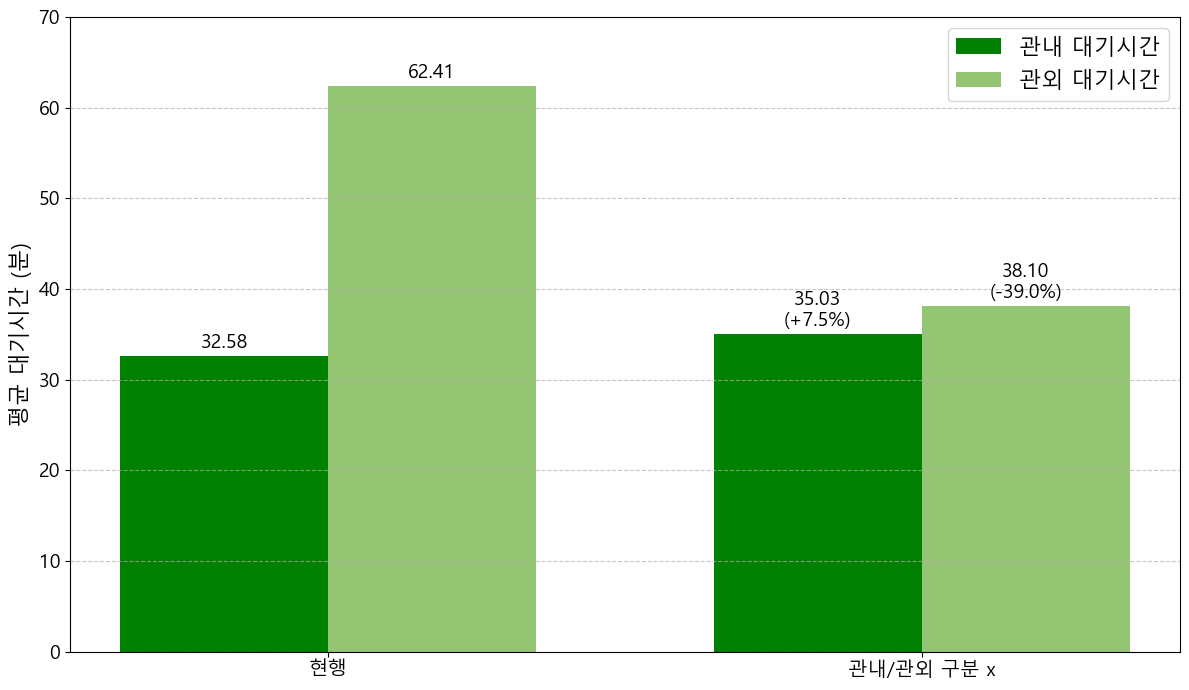

In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import re

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'
dispatch_log_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/data/merged_dispatch_log_202506.csv'
universal_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_forceBOTH_202506*.csv'))

# --- 그래프 설정 변수 ---
y_min = 0
y_max = 70
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14
bar_width = 0.35

# ==========================================================
# 📊 실제 데이터 기반으로 대기시간 평균 계산
# ==========================================================
print("데이터 로딩 및 평균 대기시간 계산 중...")

# --- 현행 시나리오 대기시간 계산 ---
try:
    df_baseline = pd.read_csv(dispatch_log_path, encoding='utf-8')
    
    # 'mode' 컬럼이 '특별교통수단'인 데이터만 필터링
    df_baseline = df_baseline[df_baseline['mode'] == '특별교통수단']
    df_baseline = df_baseline[df_baseline['type'] == '즉시']

    # 새로운 관내/관외 구분 로직 적용
    df_baseline['new_in_out'] = '관외'
    df_baseline.loc[(df_baseline['origin1'].str.contains('경기도 화성시', na=False)) & (df_baseline['destination1'].str.contains('경기도 화성시', na=False)), 'new_in_out'] = '관내'
    
    df_baseline['waiting_time'] = (pd.to_datetime(df_baseline['boarding_time']) - pd.to_datetime(df_baseline['receipt_time'])).dt.total_seconds() / 60
    
    avg_baseline_in = df_baseline[df_baseline['new_in_out'] == '관내']['waiting_time'].mean()
    avg_baseline_out = df_baseline[df_baseline['new_in_out'] == '관외']['waiting_time'].mean()
    print(f"현행 시나리오: 관내 평균 대기시간 = {avg_baseline_in:.2f}분, 관외 평균 대기시간 = {avg_baseline_out:.2f}분")

except FileNotFoundError:
    print(f"오류: 현행 시나리오 파일 '{dispatch_log_path}'을 찾을 수 없습니다.")
    avg_baseline_in, avg_baseline_out = None, None
except Exception as e:
    print(f"현행 시나리오 파일 처리 중 오류 발생: {e}")
    print("오류 상세:", e)
    avg_baseline_in, avg_baseline_out = None, None

# --- 범용 시나리오 대기시간 계산 ---
avg_universal_in, avg_universal_out = None, None
if universal_file_list:
    try:
        df_universal_list = [pd.read_csv(f, encoding='utf-8') for f in universal_file_list]
        df_universal = pd.concat(df_universal_list, ignore_index=True)
        
        # 새로운 관내/관외 구분 로직: 'pickup_depot_name'과 'dropoff_depot_name'을 사용
        # 두 컬럼에 모두 값이 있으면 '관내', 하나만 있으면 '관외'
        df_universal['new_in_out'] = '관외'
        df_universal.loc[(df_universal['pickup_depot_name'].notna()) & (df_universal['dropoff_depot_name'].notna()), 'new_in_out'] = '관내'
        
        df_universal['waiting_time'] = (pd.to_datetime(df_universal['pickup_time']) - pd.to_datetime(df_universal['request_time'])).dt.total_seconds() / 60
        
        # 새로운 구분 기준('new_in_out')으로 평균 대기시간 계산
        avg_universal_in = df_universal[df_universal['new_in_out'] == '관내']['waiting_time'].mean()
        avg_universal_out = df_universal[df_universal['new_in_out'] == '관외']['waiting_time'].mean()
        print(f"범용 시나리오: 관내 평균 대기시간 = {avg_universal_in:.2f}분, 관외 평균 대기시간 = {avg_universal_out:.2f}분")

    except Exception as e:
        print(f"범용 시나리오 파일 처리 중 오류 발생: {e}")
        print("오류 상세:", e)
else:
    print("범용 시나리오 파일을 찾을 수 없습니다. (universal_simple_demand_log_202506*.csv)")
    
# ==========================================================

# --- 1. 그래프 데이터 준비 ---
scenario_data_list = []

if avg_baseline_in is not None and avg_baseline_out is not None:
    scenario_data_list.append({'scenario_name': '현행', '관내': avg_baseline_in, '관외': avg_baseline_out})

if avg_universal_in is not None and avg_universal_out is not None:
    scenario_data_list.append({'scenario_name': '관내/관외 구분 x', '관내': avg_universal_in, '관외': avg_universal_out})

# --- 2. 막대 그래프 생성 ---
if scenario_data_list:
    df_results = pd.DataFrame(scenario_data_list)
    x = np.arange(len(df_results))
    fig, ax = plt.subplots(figsize=(12, 7))
    
    rects1 = ax.bar(x - bar_width/2, df_results['관내'], bar_width, label='관내 대기시간', color='green')
    rects2 = ax.bar(x + bar_width/2, df_results['관외'], bar_width, label='관외 대기시간', color='#93C572')

    #ax.set_title('현행 vs. 범용 시나리오별 관내/관외 평균 대기시간 비교', fontsize=title_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    def autolabel_with_percentage(rects, scenario_type):
        for i, rect in enumerate(rects):
            height = rect.get_height()
            text_to_display = f'{height:.2f}'

            # '현행' 시나리오가 데이터프레임에 있는지 확인
            if '현행' in df_results['scenario_name'].values:
                baseline_row = df_results[df_results['scenario_name'] == '현행'].iloc[0]
                
                if scenario_type == '관내' and df_results['scenario_name'].iloc[i] != '현행':
                    baseline_val = baseline_row['관내']
                    if baseline_val != 0:
                        percentage_change = ((height - baseline_val) / baseline_val) * 100
                        text_to_display += f'\n({percentage_change:+.1f}%)'

                elif scenario_type == '관외' and df_results['scenario_name'].iloc[i] != '현행':
                    baseline_val = baseline_row['관외']
                    if baseline_val != 0:
                        percentage_change = ((height - baseline_val) / baseline_val) * 100
                        text_to_display += f'\n({percentage_change:+.1f}%)'
            
            ax.annotate(text_to_display,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), 
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=value_fontsize)

    autolabel_with_percentage(rects1, '관내')
    autolabel_with_percentage(rects2, '관외')
    
    ax.legend(fontsize=label_fontsize)
    plt.tight_layout()
    
    plot_path = os.path.join(folder_path, 'baseline_vs_universal_inout_comparison.png')
    plt.savefig(plot_path)
    
    print("\n------------------------------------------------------")
    print(f"관내/관외 대기시간 비교 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없거나 데이터가 부족하여 그래프를 생성할 수 없습니다.")

'baseline_with_shift_202506*.csv' 파일들을 분석 중입니다. 총 60개.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1180193609.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' 컬럼을 사용합니다.
'baseline_with_shift_realloc_12to11_30_40pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1180193609.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' 컬럼을 사용합니다.

------------------------------------------------------
시간대별 대기시간 비교 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\hourly_waiting_time_baseline_vs_universal_line.png'에 저장되었습니다.


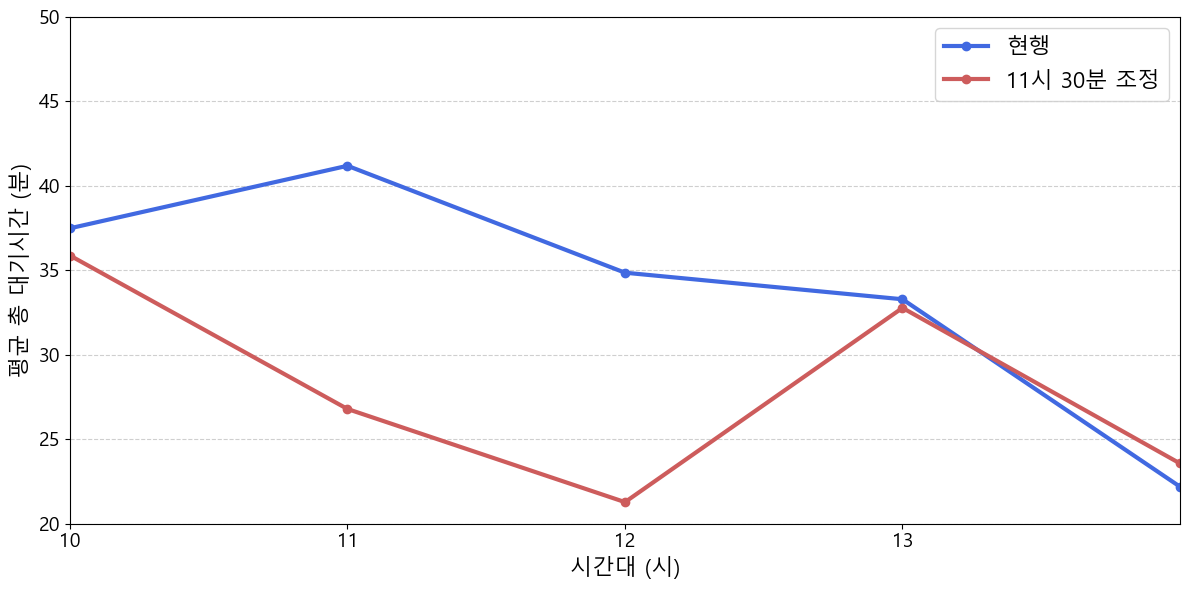

In [425]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 12
line_thickness = 3 # 선 두께 조절 변수

# y축 범위 조절 변수 추가
y_min = 20 # y축 최소값
y_max = 50 # y축 최대값

def get_hourly_average(file_pattern, folder_path, time_column):
    """
    주어진 파일 패턴의 모든 파일을 합쳐 시간대별 평균 총 대기시간을 계산합니다.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    if not file_list:
        print(f"오류: '{file_pattern}'에 해당하는 파일이 존재하지 않습니다.")
        return pd.Series(index=range(24), dtype='float64').fillna(0) # 빈 Series 반환

    print(f"'{file_pattern}' 파일들을 분석 중입니다. 총 {len(file_list)}개.")
    
    dfs = []
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    # call_waiting_minutes와 call_waiting_time을 구분하여 처리
    if 'call_waiting_minutes' in combined_df.columns:
        call_time_column = 'call_waiting_minutes'
        pickup_time_column = 'pickup_waiting_minutes'
        print("info: 'call_waiting_minutes' 컬럼을 사용합니다.")
    elif 'call_waiting_time' in combined_df.columns:
        call_time_column = 'call_waiting_time'
        pickup_time_column = 'pickup_waiting_time'
        print("info: 'call_waiting_time' 컬럼을 사용합니다.")
    else:
        print(f"오류: '{file_pattern}' 파일에 'call_waiting_minutes' 또는 'call_waiting_time' 컬럼이 없습니다.")
        return pd.Series(index=range(24), dtype='float64').fillna(0)

    # total_waiting_minutes 계산
    combined_df['total_waiting_minutes'] = combined_df[call_time_column] + combined_df[pickup_time_column]
    
    hourly_avg = combined_df.groupby(combined_df[time_column].dt.hour)['total_waiting_minutes'].mean()
    
    return hourly_avg.reindex(range(24), fill_value=0)

# --- 현행 시나리오와 범용 시나리오의 시간대별 평균 계산 ---
baseline_hourly_avg = get_hourly_average('baseline_with_shift_202506*.csv', folder_path, 'request_time')
universal_hourly_avg = get_hourly_average('baseline_with_shift_realloc_12to11_30_40pct_202506*.csv', folder_path, 'request_time')

# --- 두 시나리오의 데이터를 하나의 데이터프레임으로 합치기 ---
df_comparison = pd.DataFrame({
    '현행': baseline_hourly_avg,
    '범용': universal_hourly_avg
})

# --- 꺾은선 그래프 생성 ---
if not df_comparison.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(df_comparison.index, df_comparison['현행'], marker='o', label='현행', color='royalblue', linewidth=line_thickness)
    ax.plot(df_comparison.index, df_comparison['범용'], marker='o', label='11시 30분 조정', color='indianred', linewidth=line_thickness)

    # --- X축 범위 및 눈금 조절 코드 추가 ---
    ax.set_xlim(10, 14)
    ax.set_xticks(range(10, 14))
    # --- X축 범위 및 눈금 조절 코드 추가 ---

    # --- Y축 범위 설정 추가 ---
    ax.set_ylim(y_min, y_max)
    # --- Y축 범위 설정 추가 ---
    
    #ax.set_title('현행 vs. 범용 시나리오 시간대별 평균 총 대기시간 비교', fontsize=title_fontsize)
    ax.set_xlabel('시간대 (시)', fontsize=label_fontsize)
    ax.set_ylabel('평균 총 대기시간 (분)', fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'hourly_waiting_time_baseline_vs_universal_line.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시간대별 대기시간 비교 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

'baseline_demand_log' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_realloc_12to12_30_20pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_realloc_12to12_30_40pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_realloc_12to12_30_60pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_realloc_12to12_30_80pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_realloc_12to12_30_100pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])



------------------------------------------------------
시나리오별 평균 대기시간을 비교하는 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\region_analysis_comparison.png'에 저장되었습니다.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


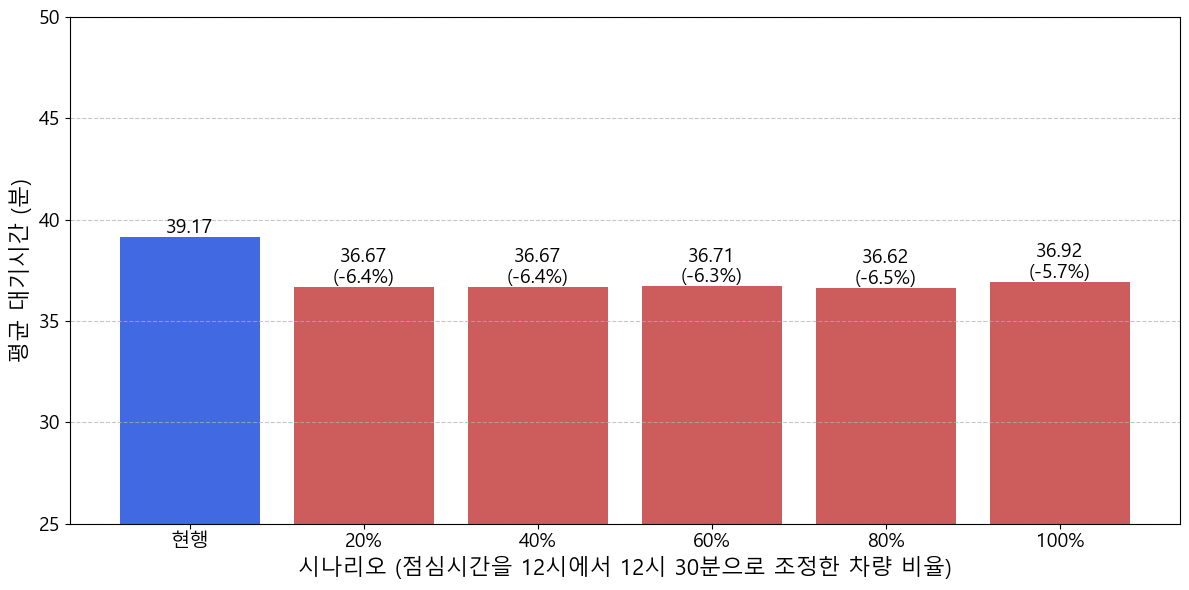

In [428]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 25
y_max = 50

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name, time_column):
    """
    주어진 파일 목록의 데이터를 합쳐 평균 대기시간을 계산합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None

    print(f"'{group_name}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df[time_column]).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- 각 시나리오별 평균 대기시간을 저장할 리스트 ---
scenario_data = []

# --- 1. 현행(baseline) 시나리오 평균 대기시간 계산 (request_time 사용) ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log', 'request_time')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': '현행', 'average_time': avg_baseline})

# --- 2. 지역 분석 시나리오별 평균 대기시간 계산 (call_time 사용) ---
for n_pct in range(20, 101, 20):
    
    # 파일 패턴 생성
    file_pattern = f'baseline_with_shift_realloc_12to12_30_{n_pct}pct_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # 평균 대기시간 계산
    avg_additional = calculate_group_average(additional_file_list, file_pattern, 'request_time')
    
    if avg_additional is not None:
        scenario_name = f'{n_pct}%'
        scenario_data.append({'scenario_name': scenario_name, 'average_time': avg_additional})

# --- 시나리오별 평균 대기시간 비교 그래프 생성 ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # 현행 시나리오만 다른 색상으로 지정
    colors = ['royalblue'] + ['indianred'] * (len(df_results) - 1)

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('지역 분석 시나리오별 평균 대기시간 비교', fontsize=title_fontsize)
    ax.set_xlabel('시나리오 (점심시간을 12시에서 12시 30분으로 조정한 차량 비율)', fontsize=label_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    
    # x축 라벨 수정
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # y축 범위 설정
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # 각 막대 위에 값 및 증감 비율 표시
    for i, bar in enumerate(bars):
        height = bar.get_height()
        
        # 현행 시나리오가 아니면 증감 비율 계산
        if i > 0 and avg_baseline is not None:
            percentage_change = ((height - avg_baseline) / avg_baseline) * 100
            text_to_display = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text_to_display = f'{height:.2f}'
            
        ax.text(bar.get_x() + bar.get_width()/2., height, text_to_display, 
                ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'region_analysis_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시나리오별 평균 대기시간을 비교하는 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

'baseline_with_shift_202506*.csv' 파일들을 분석 중입니다. 총 60개.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1597303712.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' 컬럼을 사용합니다.
'baseline_with_shift_realloc_12to12_30_40pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1597303712.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' 컬럼을 사용합니다.

------------------------------------------------------
시간대별 대기시간 비교 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\hourly_waiting_time_baseline_vs_universal_line.png'에 저장되었습니다.


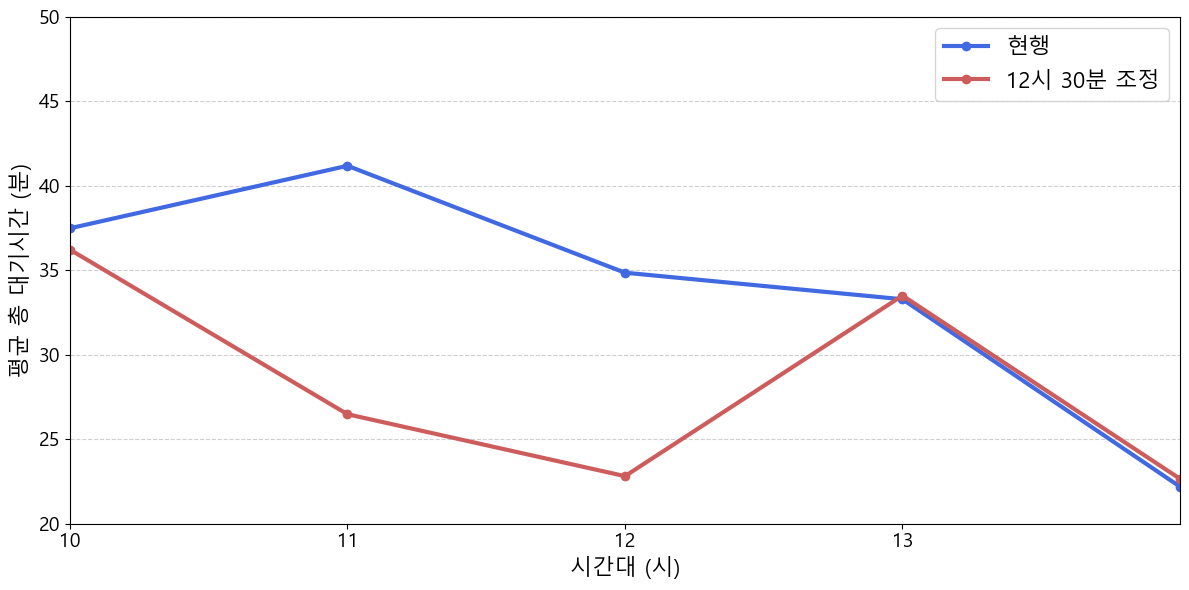

In [426]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 12
line_thickness = 3 # 선 두께 조절 변수

# y축 범위 조절 변수 추가
y_min = 20 # y축 최소값
y_max = 50 # y축 최대값

def get_hourly_average(file_pattern, folder_path, time_column):
    """
    주어진 파일 패턴의 모든 파일을 합쳐 시간대별 평균 총 대기시간을 계산합니다.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    if not file_list:
        print(f"오류: '{file_pattern}'에 해당하는 파일이 존재하지 않습니다.")
        return pd.Series(index=range(24), dtype='float64').fillna(0) # 빈 Series 반환

    print(f"'{file_pattern}' 파일들을 분석 중입니다. 총 {len(file_list)}개.")
    
    dfs = []
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    # call_waiting_minutes와 call_waiting_time을 구분하여 처리
    if 'call_waiting_minutes' in combined_df.columns:
        call_time_column = 'call_waiting_minutes'
        pickup_time_column = 'pickup_waiting_minutes'
        print("info: 'call_waiting_minutes' 컬럼을 사용합니다.")
    elif 'call_waiting_time' in combined_df.columns:
        call_time_column = 'call_waiting_time'
        pickup_time_column = 'pickup_waiting_time'
        print("info: 'call_waiting_time' 컬럼을 사용합니다.")
    else:
        print(f"오류: '{file_pattern}' 파일에 'call_waiting_minutes' 또는 'call_waiting_time' 컬럼이 없습니다.")
        return pd.Series(index=range(24), dtype='float64').fillna(0)

    # total_waiting_minutes 계산
    combined_df['total_waiting_minutes'] = combined_df[call_time_column] + combined_df[pickup_time_column]
    
    hourly_avg = combined_df.groupby(combined_df[time_column].dt.hour)['total_waiting_minutes'].mean()
    
    return hourly_avg.reindex(range(24), fill_value=0)

# --- 현행 시나리오와 범용 시나리오의 시간대별 평균 계산 ---
baseline_hourly_avg = get_hourly_average('baseline_with_shift_202506*.csv', folder_path, 'request_time')
universal_hourly_avg = get_hourly_average('baseline_with_shift_realloc_12to12_30_40pct_202506*.csv', folder_path, 'request_time')

# --- 두 시나리오의 데이터를 하나의 데이터프레임으로 합치기 ---
df_comparison = pd.DataFrame({
    '현행': baseline_hourly_avg,
    '범용': universal_hourly_avg
})

# --- 꺾은선 그래프 생성 ---
if not df_comparison.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(df_comparison.index, df_comparison['현행'], marker='o', label='현행', color='royalblue', linewidth=line_thickness)
    ax.plot(df_comparison.index, df_comparison['범용'], marker='o', label='12시 30분 조정', color='indianred', linewidth=line_thickness)

    # --- X축 범위 및 눈금 조절 코드 추가 ---
    ax.set_xlim(10, 14)
    ax.set_xticks(range(10, 14))
    # --- X축 범위 및 눈금 조절 코드 추가 ---

    # --- Y축 범위 설정 추가 ---
    ax.set_ylim(y_min, y_max)
    # --- Y축 범위 설정 추가 ---
    
    #ax.set_title('현행 vs. 범용 시나리오 시간대별 평균 총 대기시간 비교', fontsize=title_fontsize)
    ax.set_xlabel('시간대 (시)', fontsize=label_fontsize)
    ax.set_ylabel('평균 총 대기시간 (분)', fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'hourly_waiting_time_baseline_vs_universal_line.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시간대별 대기시간 비교 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

'baseline_demand_log' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_8to7_20pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_8to7_40pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_8to7_60pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_8to7_80pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_8to7_100pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])



------------------------------------------------------
시나리오별 평균 대기시간을 비교하는 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\region_analysis_comparison.png'에 저장되었습니다.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


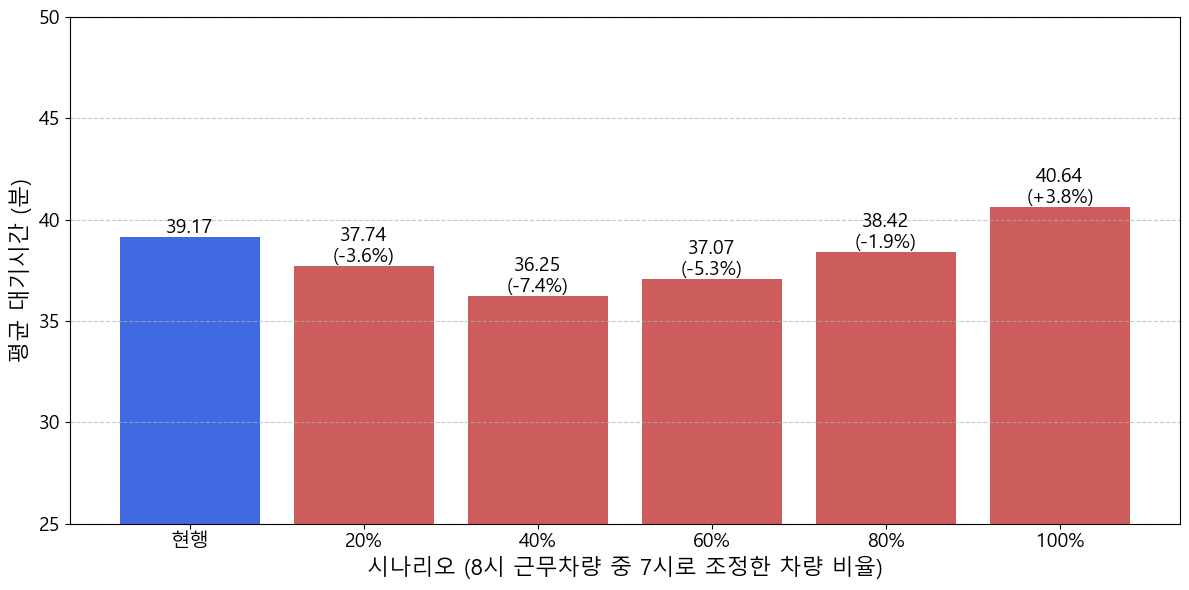

In [408]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 25
y_max = 50

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name, time_column):
    """
    주어진 파일 목록의 데이터를 합쳐 평균 대기시간을 계산합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None

    print(f"'{group_name}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df[time_column]).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- 각 시나리오별 평균 대기시간을 저장할 리스트 ---
scenario_data = []

# --- 1. 현행(baseline) 시나리오 평균 대기시간 계산 (request_time 사용) ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log', 'request_time')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': '현행', 'average_time': avg_baseline})

# --- 2. 지역 분석 시나리오별 평균 대기시간 계산 (call_time 사용) ---
for n_pct in range(20, 101, 20):
    
    # 파일 패턴 생성
    file_pattern = f'baseline_with_shift_8to7_{n_pct}pct_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # 평균 대기시간 계산
    avg_additional = calculate_group_average(additional_file_list, file_pattern, 'request_time')
    
    if avg_additional is not None:
        scenario_name = f'{n_pct}%'
        scenario_data.append({'scenario_name': scenario_name, 'average_time': avg_additional})

# --- 시나리오별 평균 대기시간 비교 그래프 생성 ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # 현행 시나리오만 다른 색상으로 지정
    colors = ['royalblue'] + ['indianred'] * (len(df_results) - 1)

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('지역 분석 시나리오별 평균 대기시간 비교', fontsize=title_fontsize)
    ax.set_xlabel('시나리오 (8시 근무차량 중 7시로 조정한 차량 비율)', fontsize=label_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    
    # x축 라벨 수정
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # y축 범위 설정
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # 각 막대 위에 값 및 증감 비율 표시
    for i, bar in enumerate(bars):
        height = bar.get_height()
        
        # 현행 시나리오가 아니면 증감 비율 계산
        if i > 0 and avg_baseline is not None:
            percentage_change = ((height - avg_baseline) / avg_baseline) * 100
            text_to_display = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text_to_display = f'{height:.2f}'
            
        ax.text(bar.get_x() + bar.get_width()/2., height, text_to_display, 
                ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'region_analysis_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시나리오별 평균 대기시간을 비교하는 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

'baseline_with_shift_202506*.csv' 파일들을 분석 중입니다. 총 60개.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\793794398.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' 컬럼을 사용합니다.
'baseline_with_shift_8to7_40pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\793794398.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' 컬럼을 사용합니다.

------------------------------------------------------
시간대별 대기시간 비교 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\hourly_waiting_time_baseline_vs_universal_line.png'에 저장되었습니다.


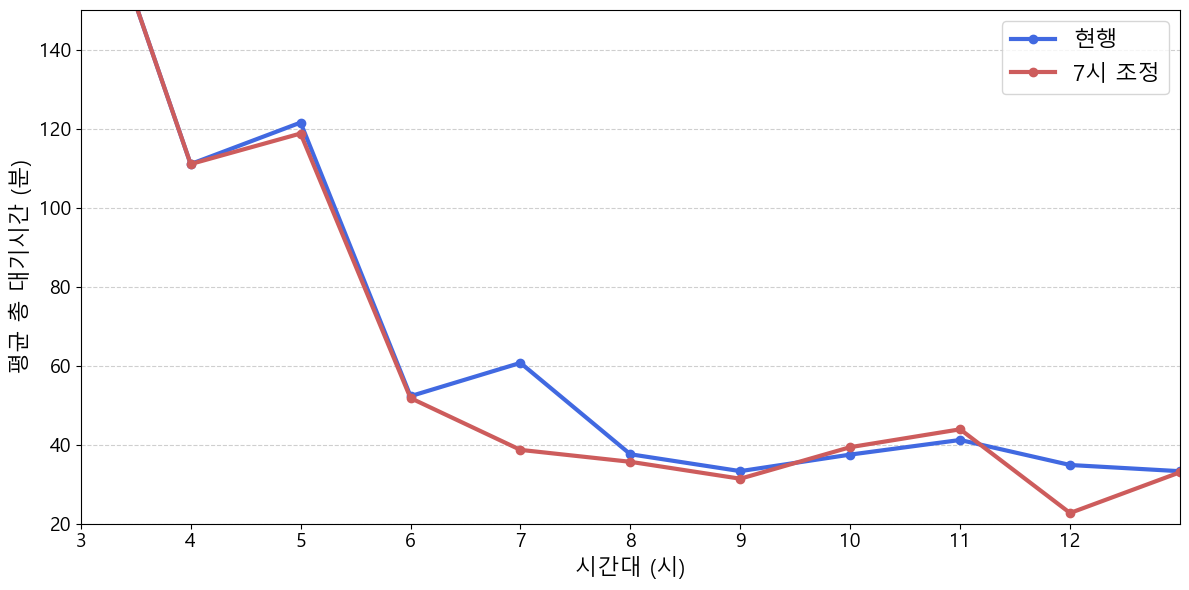

In [407]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 12
line_thickness = 3 # 선 두께 조절 변수

# y축 범위 조절 변수 추가
y_min = 20 # y축 최소값
y_max = 150 # y축 최대값

def get_hourly_average(file_pattern, folder_path, time_column):
    """
    주어진 파일 패턴의 모든 파일을 합쳐 시간대별 평균 총 대기시간을 계산합니다.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    if not file_list:
        print(f"오류: '{file_pattern}'에 해당하는 파일이 존재하지 않습니다.")
        return pd.Series(index=range(24), dtype='float64').fillna(0) # 빈 Series 반환

    print(f"'{file_pattern}' 파일들을 분석 중입니다. 총 {len(file_list)}개.")
    
    dfs = []
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    # call_waiting_minutes와 call_waiting_time을 구분하여 처리
    if 'call_waiting_minutes' in combined_df.columns:
        call_time_column = 'call_waiting_minutes'
        pickup_time_column = 'pickup_waiting_minutes'
        print("info: 'call_waiting_minutes' 컬럼을 사용합니다.")
    elif 'call_waiting_time' in combined_df.columns:
        call_time_column = 'call_waiting_time'
        pickup_time_column = 'pickup_waiting_time'
        print("info: 'call_waiting_time' 컬럼을 사용합니다.")
    else:
        print(f"오류: '{file_pattern}' 파일에 'call_waiting_minutes' 또는 'call_waiting_time' 컬럼이 없습니다.")
        return pd.Series(index=range(24), dtype='float64').fillna(0)

    # total_waiting_minutes 계산
    combined_df['total_waiting_minutes'] = combined_df[call_time_column] + combined_df[pickup_time_column]
    
    hourly_avg = combined_df.groupby(combined_df[time_column].dt.hour)['total_waiting_minutes'].mean()
    
    return hourly_avg.reindex(range(24), fill_value=0)

# --- 현행 시나리오와 범용 시나리오의 시간대별 평균 계산 ---
baseline_hourly_avg = get_hourly_average('baseline_with_shift_202506*.csv', folder_path, 'request_time')
universal_hourly_avg = get_hourly_average('baseline_with_shift_8to7_40pct_202506*.csv', folder_path, 'request_time')

# --- 두 시나리오의 데이터를 하나의 데이터프레임으로 합치기 ---
df_comparison = pd.DataFrame({
    '현행': baseline_hourly_avg,
    '범용': universal_hourly_avg
})

# --- 꺾은선 그래프 생성 ---
if not df_comparison.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(df_comparison.index, df_comparison['현행'], marker='o', label='현행', color='royalblue', linewidth=line_thickness)
    ax.plot(df_comparison.index, df_comparison['범용'], marker='o', label='7시 조정', color='indianred', linewidth=line_thickness)

    # --- X축 범위 및 눈금 조절 코드 추가 ---
    ax.set_xlim(3, 13)
    ax.set_xticks(range(3, 13))
    # --- X축 범위 및 눈금 조절 코드 추가 ---

    # --- Y축 범위 설정 추가 ---
    ax.set_ylim(y_min, y_max)
    # --- Y축 범위 설정 추가 ---
    
    #ax.set_title('현행 vs. 범용 시나리오 시간대별 평균 총 대기시간 비교', fontsize=title_fontsize)
    ax.set_xlabel('시간대 (시)', fontsize=label_fontsize)
    ax.set_ylabel('평균 총 대기시간 (분)', fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'hourly_waiting_time_baseline_vs_universal_line.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시간대별 대기시간 비교 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

'baseline_demand_log' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to5_20pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to5_40pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to5_60pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to5_80pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to5_100pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])



------------------------------------------------------
시나리오별 평균 대기시간을 비교하는 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\region_analysis_comparison.png'에 저장되었습니다.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


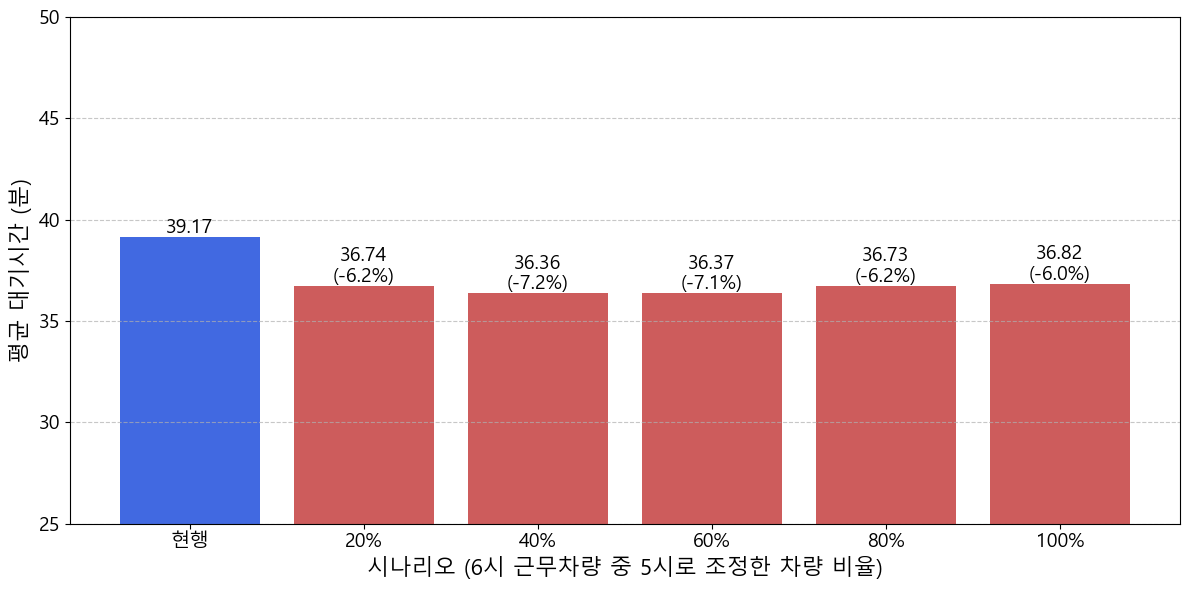

In [400]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 25
y_max = 50

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name, time_column):
    """
    주어진 파일 목록의 데이터를 합쳐 평균 대기시간을 계산합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None

    print(f"'{group_name}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df[time_column]).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- 각 시나리오별 평균 대기시간을 저장할 리스트 ---
scenario_data = []

# --- 1. 현행(baseline) 시나리오 평균 대기시간 계산 (request_time 사용) ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log', 'request_time')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': '현행', 'average_time': avg_baseline})

# --- 2. 지역 분석 시나리오별 평균 대기시간 계산 (call_time 사용) ---
for n_pct in range(20, 101, 20):
    
    # 파일 패턴 생성
    file_pattern = f'baseline_with_shift_6to5_{n_pct}pct_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # 평균 대기시간 계산
    avg_additional = calculate_group_average(additional_file_list, file_pattern, 'request_time')
    
    if avg_additional is not None:
        scenario_name = f'{n_pct}%'
        scenario_data.append({'scenario_name': scenario_name, 'average_time': avg_additional})

# --- 시나리오별 평균 대기시간 비교 그래프 생성 ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # 현행 시나리오만 다른 색상으로 지정
    colors = ['royalblue'] + ['indianred'] * (len(df_results) - 1)

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('지역 분석 시나리오별 평균 대기시간 비교', fontsize=title_fontsize)
    ax.set_xlabel('시나리오 (6시 근무차량 중 5시로 조정한 차량 비율)', fontsize=label_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    
    # x축 라벨 수정
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # y축 범위 설정
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # 각 막대 위에 값 및 증감 비율 표시
    for i, bar in enumerate(bars):
        height = bar.get_height()
        
        # 현행 시나리오가 아니면 증감 비율 계산
        if i > 0 and avg_baseline is not None:
            percentage_change = ((height - avg_baseline) / avg_baseline) * 100
            text_to_display = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text_to_display = f'{height:.2f}'
            
        ax.text(bar.get_x() + bar.get_width()/2., height, text_to_display, 
                ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'region_analysis_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시나리오별 평균 대기시간을 비교하는 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

'baseline_with_shift_202506*.csv' 파일들을 분석 중입니다. 총 60개.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1293054873.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' 컬럼을 사용합니다.
'baseline_with_shift_6to5_40pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1293054873.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' 컬럼을 사용합니다.

------------------------------------------------------
시간대별 대기시간 비교 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\hourly_waiting_time_baseline_vs_universal_line.png'에 저장되었습니다.


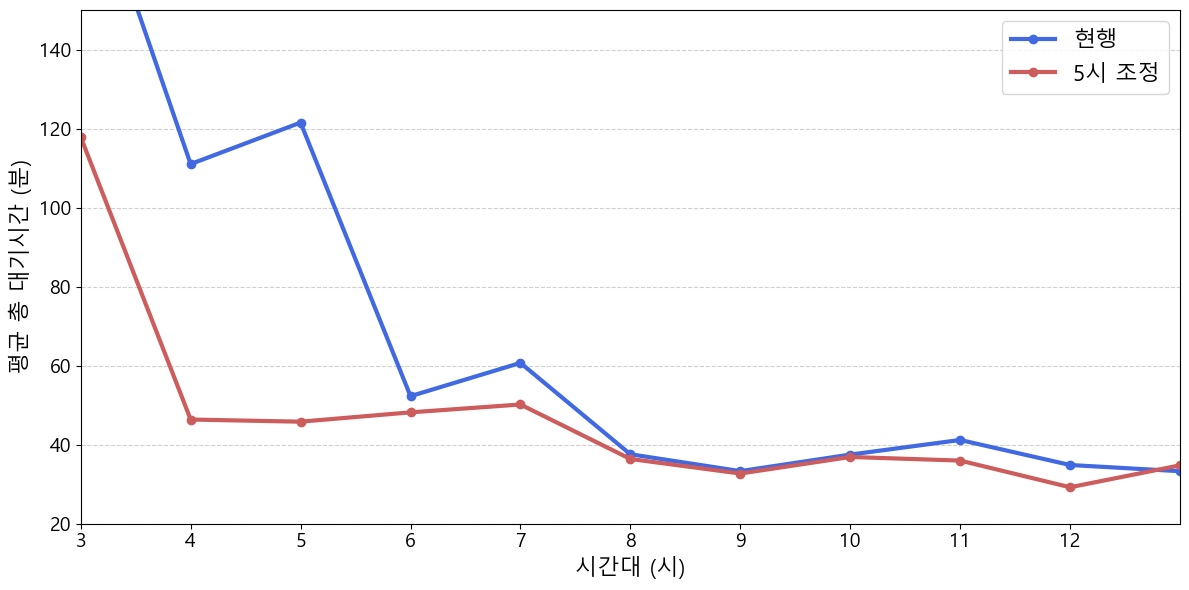

In [405]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 12
line_thickness = 3 # 선 두께 조절 변수

# y축 범위 조절 변수 추가
y_min = 20 # y축 최소값
y_max = 150 # y축 최대값

def get_hourly_average(file_pattern, folder_path, time_column):
    """
    주어진 파일 패턴의 모든 파일을 합쳐 시간대별 평균 총 대기시간을 계산합니다.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    if not file_list:
        print(f"오류: '{file_pattern}'에 해당하는 파일이 존재하지 않습니다.")
        return pd.Series(index=range(24), dtype='float64').fillna(0) # 빈 Series 반환

    print(f"'{file_pattern}' 파일들을 분석 중입니다. 총 {len(file_list)}개.")
    
    dfs = []
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    # call_waiting_minutes와 call_waiting_time을 구분하여 처리
    if 'call_waiting_minutes' in combined_df.columns:
        call_time_column = 'call_waiting_minutes'
        pickup_time_column = 'pickup_waiting_minutes'
        print("info: 'call_waiting_minutes' 컬럼을 사용합니다.")
    elif 'call_waiting_time' in combined_df.columns:
        call_time_column = 'call_waiting_time'
        pickup_time_column = 'pickup_waiting_time'
        print("info: 'call_waiting_time' 컬럼을 사용합니다.")
    else:
        print(f"오류: '{file_pattern}' 파일에 'call_waiting_minutes' 또는 'call_waiting_time' 컬럼이 없습니다.")
        return pd.Series(index=range(24), dtype='float64').fillna(0)

    # total_waiting_minutes 계산
    combined_df['total_waiting_minutes'] = combined_df[call_time_column] + combined_df[pickup_time_column]
    
    hourly_avg = combined_df.groupby(combined_df[time_column].dt.hour)['total_waiting_minutes'].mean()
    
    return hourly_avg.reindex(range(24), fill_value=0)

# --- 현행 시나리오와 범용 시나리오의 시간대별 평균 계산 ---
baseline_hourly_avg = get_hourly_average('baseline_with_shift_202506*.csv', folder_path, 'request_time')
universal_hourly_avg = get_hourly_average('baseline_with_shift_6to5_40pct_202506*.csv', folder_path, 'request_time')

# --- 두 시나리오의 데이터를 하나의 데이터프레임으로 합치기 ---
df_comparison = pd.DataFrame({
    '현행': baseline_hourly_avg,
    '범용': universal_hourly_avg
})

# --- 꺾은선 그래프 생성 ---
if not df_comparison.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(df_comparison.index, df_comparison['현행'], marker='o', label='현행', color='royalblue', linewidth=line_thickness)
    ax.plot(df_comparison.index, df_comparison['범용'], marker='o', label='5시 조정', color='indianred', linewidth=line_thickness)

    # --- X축 범위 및 눈금 조절 코드 추가 ---
    ax.set_xlim(3, 13)
    ax.set_xticks(range(3, 13))
    # --- X축 범위 및 눈금 조절 코드 추가 ---

    # --- Y축 범위 설정 추가 ---
    ax.set_ylim(y_min, y_max)
    # --- Y축 범위 설정 추가 ---
    
    #ax.set_title('현행 vs. 범용 시나리오 시간대별 평균 총 대기시간 비교', fontsize=title_fontsize)
    ax.set_xlabel('시간대 (시)', fontsize=label_fontsize)
    ax.set_ylabel('평균 총 대기시간 (분)', fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'hourly_waiting_time_baseline_vs_universal_line.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시간대별 대기시간 비교 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

'baseline_demand_log' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to4_20pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to4_40pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to4_60pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to4_80pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to4_100pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])



------------------------------------------------------
시나리오별 평균 대기시간을 비교하는 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\region_analysis_comparison.png'에 저장되었습니다.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


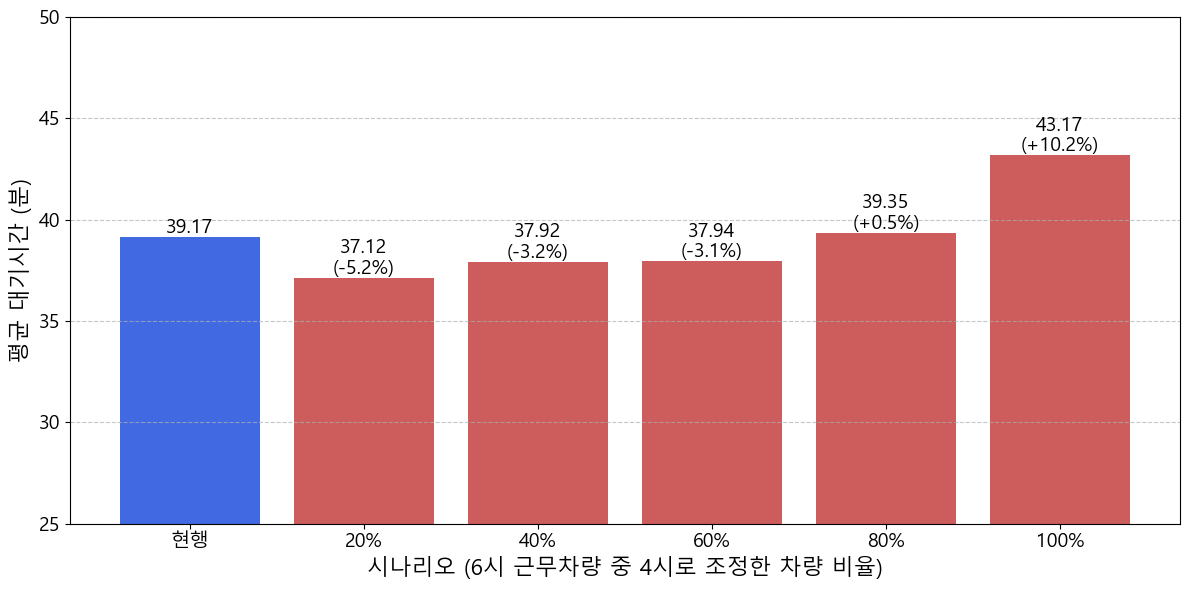

In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 25
y_max = 50

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name, time_column):
    """
    주어진 파일 목록의 데이터를 합쳐 평균 대기시간을 계산합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None

    print(f"'{group_name}' 파일들을 분석 중입니다. 총 {len(file_list)}개.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df[time_column]).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- 각 시나리오별 평균 대기시간을 저장할 리스트 ---
scenario_data = []

# --- 1. 현행(baseline) 시나리오 평균 대기시간 계산 (request_time 사용) ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log', 'request_time')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': '현행', 'average_time': avg_baseline})

# --- 2. 지역 분석 시나리오별 평균 대기시간 계산 (call_time 사용) ---
for n_pct in range(20, 101, 20):
    
    # 파일 패턴 생성
    file_pattern = f'baseline_with_shift_6to4_{n_pct}pct_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # 평균 대기시간 계산
    avg_additional = calculate_group_average(additional_file_list, file_pattern, 'request_time')
    
    if avg_additional is not None:
        scenario_name = f'{n_pct}%'
        scenario_data.append({'scenario_name': scenario_name, 'average_time': avg_additional})

# --- 시나리오별 평균 대기시간 비교 그래프 생성 ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # 현행 시나리오만 다른 색상으로 지정
    colors = ['royalblue'] + ['indianred'] * (len(df_results) - 1)

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('지역 분석 시나리오별 평균 대기시간 비교', fontsize=title_fontsize)
    ax.set_xlabel('시나리오 (6시 근무차량 중 4시로 조정한 차량 비율)', fontsize=label_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    
    # x축 라벨 수정
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # y축 범위 설정
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # 각 막대 위에 값 및 증감 비율 표시
    for i, bar in enumerate(bars):
        height = bar.get_height()
        
        # 현행 시나리오가 아니면 증감 비율 계산
        if i > 0 and avg_baseline is not None:
            percentage_change = ((height - avg_baseline) / avg_baseline) * 100
            text_to_display = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text_to_display = f'{height:.2f}'
            
        ax.text(bar.get_x() + bar.get_width()/2., height, text_to_display, 
                ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'region_analysis_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시나리오별 평균 대기시간을 비교하는 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

'baseline_with_shift_202506*.csv' 파일들을 분석 중입니다. 총 60개.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2481535192.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' 컬럼을 사용합니다.
'baseline_with_shift_6to4_20pct_202506*.csv' 파일들을 분석 중입니다. 총 60개.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2481535192.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' 컬럼을 사용합니다.

------------------------------------------------------
시간대별 대기시간 비교 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\hourly_waiting_time_baseline_vs_universal_line.png'에 저장되었습니다.


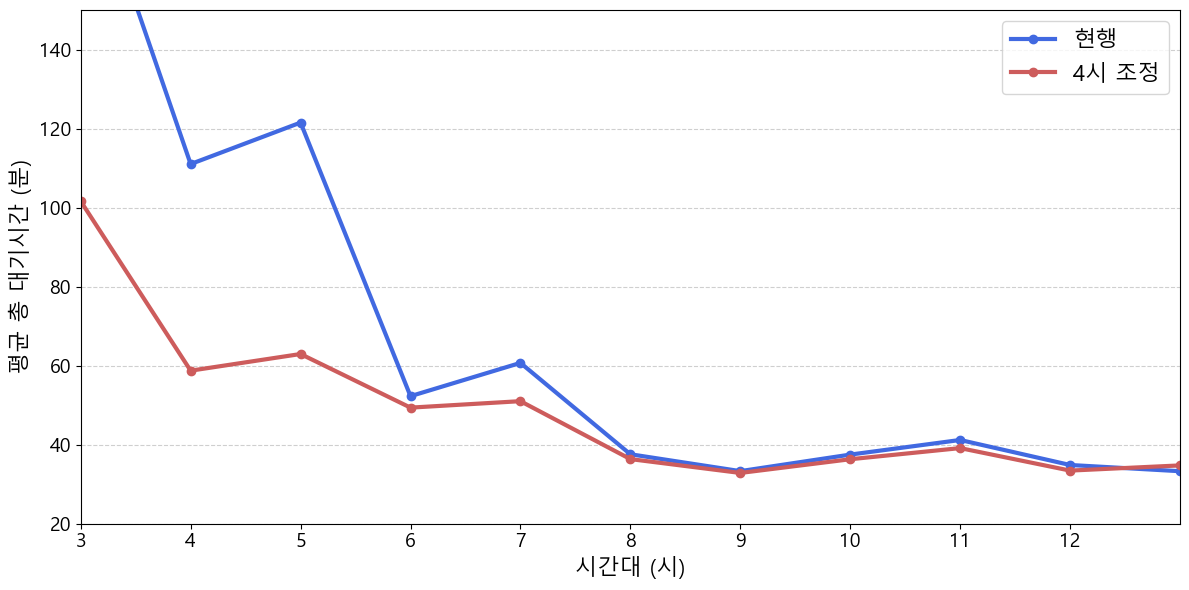

In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 12
line_thickness = 3 # 선 두께 조절 변수

# y축 범위 조절 변수 추가
y_min = 20 # y축 최소값
y_max = 150 # y축 최대값

def get_hourly_average(file_pattern, folder_path, time_column):
    """
    주어진 파일 패턴의 모든 파일을 합쳐 시간대별 평균 총 대기시간을 계산합니다.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    if not file_list:
        print(f"오류: '{file_pattern}'에 해당하는 파일이 존재하지 않습니다.")
        return pd.Series(index=range(24), dtype='float64').fillna(0) # 빈 Series 반환

    print(f"'{file_pattern}' 파일들을 분석 중입니다. 총 {len(file_list)}개.")
    
    dfs = []
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    # call_waiting_minutes와 call_waiting_time을 구분하여 처리
    if 'call_waiting_minutes' in combined_df.columns:
        call_time_column = 'call_waiting_minutes'
        pickup_time_column = 'pickup_waiting_minutes'
        print("info: 'call_waiting_minutes' 컬럼을 사용합니다.")
    elif 'call_waiting_time' in combined_df.columns:
        call_time_column = 'call_waiting_time'
        pickup_time_column = 'pickup_waiting_time'
        print("info: 'call_waiting_time' 컬럼을 사용합니다.")
    else:
        print(f"오류: '{file_pattern}' 파일에 'call_waiting_minutes' 또는 'call_waiting_time' 컬럼이 없습니다.")
        return pd.Series(index=range(24), dtype='float64').fillna(0)

    # total_waiting_minutes 계산
    combined_df['total_waiting_minutes'] = combined_df[call_time_column] + combined_df[pickup_time_column]
    
    hourly_avg = combined_df.groupby(combined_df[time_column].dt.hour)['total_waiting_minutes'].mean()
    
    return hourly_avg.reindex(range(24), fill_value=0)

# --- 현행 시나리오와 범용 시나리오의 시간대별 평균 계산 ---
baseline_hourly_avg = get_hourly_average('baseline_with_shift_202506*.csv', folder_path, 'request_time')
universal_hourly_avg = get_hourly_average('baseline_with_shift_6to4_20pct_202506*.csv', folder_path, 'request_time')

# --- 두 시나리오의 데이터를 하나의 데이터프레임으로 합치기 ---
df_comparison = pd.DataFrame({
    '현행': baseline_hourly_avg,
    '범용': universal_hourly_avg
})

# --- 꺾은선 그래프 생성 ---
if not df_comparison.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(df_comparison.index, df_comparison['현행'], marker='o', label='현행', color='royalblue', linewidth=line_thickness)
    ax.plot(df_comparison.index, df_comparison['범용'], marker='o', label='4시 조정', color='indianred', linewidth=line_thickness)

    # --- X축 범위 및 눈금 조절 코드 추가 ---
    ax.set_xlim(3, 13)
    ax.set_xticks(range(3, 13))
    # --- X축 범위 및 눈금 조절 코드 추가 ---

    # --- Y축 범위 설정 추가 ---
    ax.set_ylim(y_min, y_max)
    # --- Y축 범위 설정 추가 ---
    
    #ax.set_title('현행 vs. 범용 시나리오 시간대별 평균 총 대기시간 비교', fontsize=title_fontsize)
    ax.set_xlabel('시간대 (시)', fontsize=label_fontsize)
    ax.set_ylabel('평균 총 대기시간 (분)', fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

    # 그래프 파일로 저장
    plot_path = os.path.join(folder_path, 'hourly_waiting_time_baseline_vs_universal_line.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"시간대별 대기시간 비교 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없어 그래프를 생성할 수 없습니다.")

C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2890655032.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2890655032.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2890655032.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\App


성공: 결합 막대 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\combined_waiting_time_comparison.png'에 저장되었습니다.


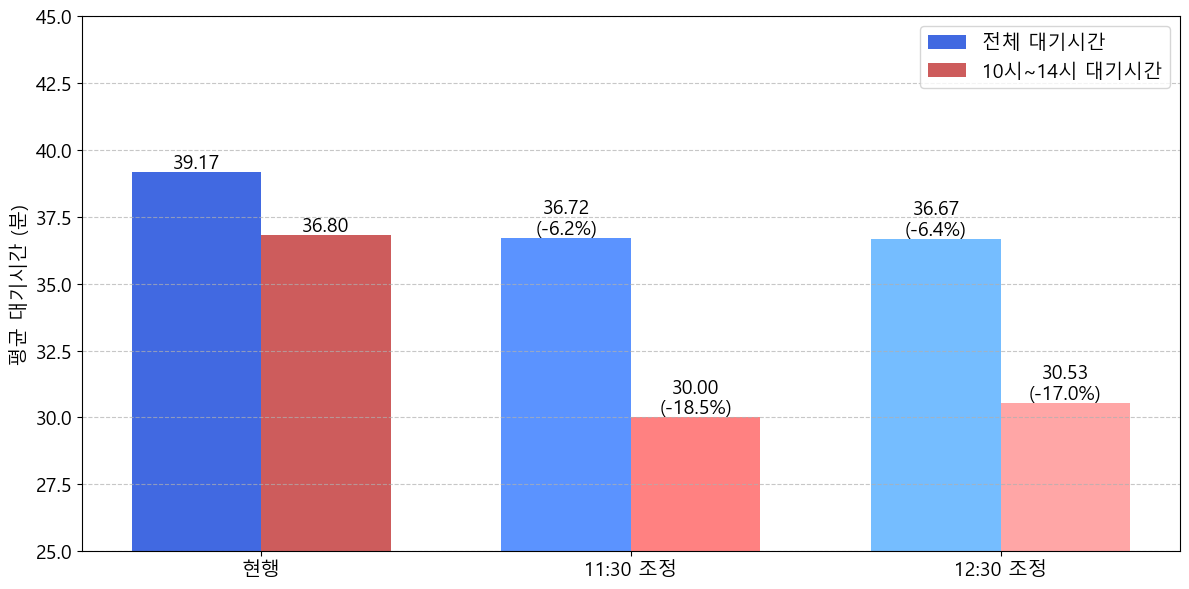

In [470]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from matplotlib.colors import to_rgb, to_hex

def adjust_lightness(color, amount):
    """
    색상의 밝기를 조절하는 함수입니다.
    amount > 1: 밝게, amount < 1: 어둡게
    """
    try:
        c = to_rgb(color)
    except ValueError:
        return color
    c_new = [x * amount for x in c]
    # 값이 0-1 범위를 벗어나지 않게 조정
    return to_hex([min(1, max(0, x)) for x in c_new])

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 25
y_max = 45

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

# 막대 너비 조절 (기본값: 0.8)
bar_width = 0.35

def get_combined_df(file_list, group_name, time_column):
    """
    주어진 파일 목록의 데이터를 합쳐 전처리된 DataFrame을 반환합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df[time_column]).dt.total_seconds() / 60
    
    return combined_df

def calculate_overall_average(combined_df):
    """전체 대기시간의 평균을 계산합니다."""
    if combined_df is None: return None
    return combined_df['calculated_waiting_minutes'].mean()

def calculate_filtered_average(combined_df, time_column):
    """10시부터 14시까지의 대기시간 평균을 계산합니다."""
    if combined_df is None: return None
    
    combined_df['request_hour'] = combined_df[time_column].dt.hour
    filtered_df = combined_df[(combined_df['request_hour'] >= 10) & (combined_df['request_hour'] < 14)]
    
    if filtered_df.empty:
        print("경고: 10시~14시 데이터가 없어 평균을 계산할 수 없습니다.")
        return None
    
    return filtered_df['calculated_waiting_minutes'].mean()

# --- 시나리오 데이터 정의 및 계산 ---
scenarios = [
    {'name': '현행', 'pattern': 'baseline_with_shift_202506*.csv', 'time_col': 'request_time'},
    {'name': '11:30 조정', 'pattern': 'baseline_with_shift_realloc_12to11_30_40pct_202506*.csv', 'time_col': 'request_time'},
    {'name': '12:30 조정', 'pattern': 'baseline_with_shift_realloc_12to12_30_40pct_202506*.csv', 'time_col': 'request_time'}
]

overall_data = []
filtered_data = []

for scenario in scenarios:
    file_list = glob.glob(os.path.join(folder_path, scenario['pattern']))
    combined_df = get_combined_df(file_list, scenario['name'], scenario['time_col'])
    
    avg_overall = calculate_overall_average(combined_df)
    avg_filtered = calculate_filtered_average(combined_df, scenario['time_col'])
    
    overall_data.append(avg_overall)
    filtered_data.append(avg_filtered)

# --- 그래프 생성 ---
if overall_data:
    scenario_names = [s['name'] for s in scenarios]
    df_results = pd.DataFrame({
        'overall': overall_data,
        'filtered': filtered_data
    }, index=scenario_names)
    
    # 현행 시나리오의 대기시간을 기준값으로 설정
    baseline_overall = df_results.loc['현행', 'overall']
    baseline_filtered = df_results.loc['현행', 'filtered']
    
    fig, ax = plt.subplots(figsize=(12, 6))

    x = np.arange(len(scenario_names))
    
    # 막대 색상 설정: royalblue 계열과 indianred 계열로 통일
    base_overall_color = 'royalblue'
    overall_colors = [base_overall_color] + [adjust_lightness(base_overall_color, 1.4), adjust_lightness(base_overall_color, 1.8)]
    
    base_filtered_color = 'indianred'
    filtered_colors = [base_filtered_color] + [adjust_lightness(base_filtered_color, 1.4), adjust_lightness(base_filtered_color, 1.8)]
    
    # '전체' 막대 그리기
    bars1 = ax.bar(x - bar_width/2, df_results['overall'], width=bar_width, label='전체 대기시간', color=overall_colors)
    # '10시~14시' 막대 그리기
    bars2 = ax.bar(x + bar_width/2, df_results['filtered'], width=bar_width, label='10시~14시 대기시간', color=filtered_colors)

    #ax.set_title('시나리오별 평균 대기시간 비교', fontsize=title_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(scenario_names, rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)

    # 각 막대 위에 값 및 증감 비율 표시
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        if scenario_names[i] != '현행':
            percentage_change = ((height - baseline_overall) / baseline_overall) * 100
            text = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text = f'{height:.2f}'
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    for i, bar in enumerate(bars2):
        height = bar.get_height()
        if scenario_names[i] != '현행':
            percentage_change = ((height - baseline_filtered) / baseline_filtered) * 100
            text = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text = f'{height:.2f}'
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()
    plot_path = os.path.join(folder_path, 'combined_waiting_time_comparison.png')
    plt.savefig(plot_path)

    print(f"\n성공: 결합 막대 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없거나 데이터가 부족하여 그래프를 생성할 수 없습니다.")

C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\872603246.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\872603246.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\872603246.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppDat


성공: 결합 막대 그래프가 'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results\combined_waiting_time_comparison.png'에 저장되었습니다.


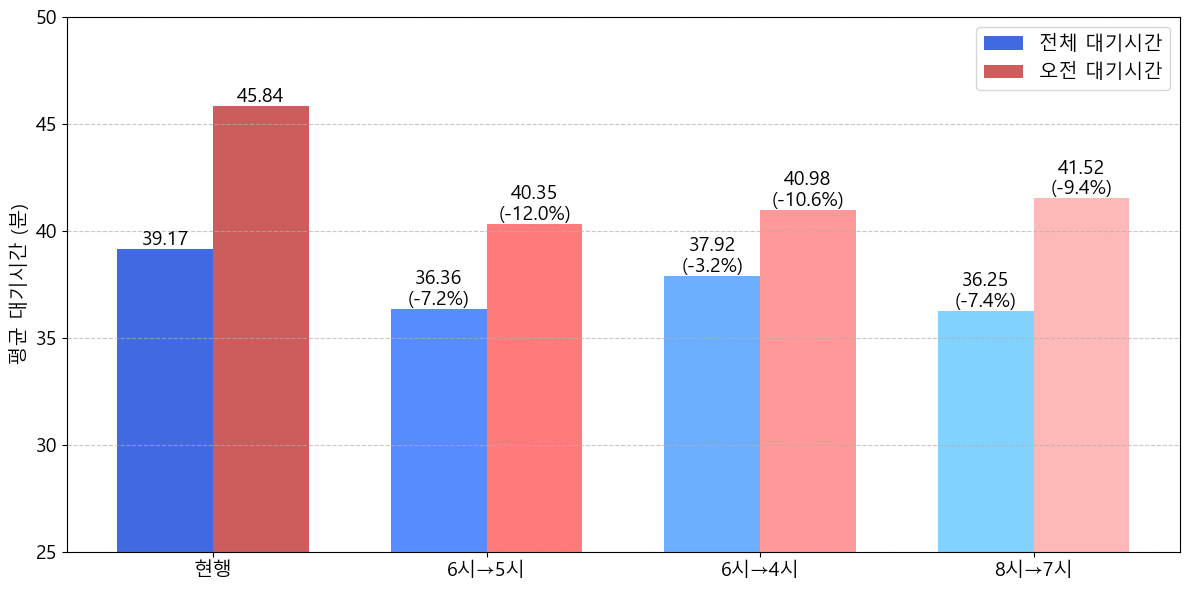

In [468]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from matplotlib.colors import to_rgb, to_hex

def adjust_lightness(color, amount):
    """
    색상의 밝기를 조절하는 함수입니다.
    amount > 1: 밝게, amount < 1: 어둡게
    """
    try:
        c = to_rgb(color)
    except ValueError:
        return color
    c_new = [x * amount for x in c]
    # 값이 0-1 범위를 벗어나지 않게 조정
    return to_hex([min(1, max(0, x)) for x in c_new])

# --- 고객님의 파일 경로를 여기에 입력하세요 ---
folder_path = r'C:/Users/hc_park/Desktop/화성특별교통수단시뮬레이션/results'

# --- 그래프 설정 변수 ---
# y축 범위 조절 (None으로 설정 시 자동)
y_min = 25
y_max = 50

# 글씨 크기 조절
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

# 막대 너비 조절 (기본값: 0.8)
bar_width = 0.35

def get_combined_df(file_list, group_name, time_column):
    """
    주어진 파일 목록의 데이터를 합쳐 전처리된 DataFrame을 반환합니다.
    """
    if not file_list:
        print(f"'{group_name}' 패턴에 해당하는 파일이 존재하지 않습니다.\n")
        return None
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df[time_column]).dt.total_seconds() / 60
    
    return combined_df

def calculate_overall_average(combined_df):
    """전체 대기시간의 평균을 계산합니다."""
    if combined_df is None: return None
    return combined_df['calculated_waiting_minutes'].mean()

def calculate_filtered_average(combined_df, time_column):
    """10시부터 14시까지의 대기시간 평균을 계산합니다."""
    if combined_df is None: return None
    
    combined_df['request_hour'] = combined_df[time_column].dt.hour
    filtered_df = combined_df[(combined_df['request_hour'] >= 0) & (combined_df['request_hour'] < 12)]
    
    if filtered_df.empty:
        print("경고: 0시~12시 데이터가 없어 평균을 계산할 수 없습니다.")
        return None
    
    return filtered_df['calculated_waiting_minutes'].mean()

# --- 시나리오 데이터 정의 및 계산 ---
scenarios = [
    {'name': '현행', 'pattern': 'baseline_with_shift_202506*.csv', 'time_col': 'request_time'},
    {'name': '6시→5시', 'pattern': 'baseline_with_shift_6to5_40pct_202506*.csv', 'time_col': 'request_time'},
    {'name': '6시→4시', 'pattern': 'baseline_with_shift_6to4_40pct_202506*.csv', 'time_col': 'request_time'},
    {'name': '8시→7시', 'pattern': 'baseline_with_shift_8to7_40pct_202506*.csv', 'time_col': 'request_time'}
]

overall_data = []
filtered_data = []

for scenario in scenarios:
    file_list = glob.glob(os.path.join(folder_path, scenario['pattern']))
    combined_df = get_combined_df(file_list, scenario['name'], scenario['time_col'])
    
    avg_overall = calculate_overall_average(combined_df)
    avg_filtered = calculate_filtered_average(combined_df, scenario['time_col'])
    
    overall_data.append(avg_overall)
    filtered_data.append(avg_filtered)

# --- 그래프 생성 ---
if overall_data:
    scenario_names = [s['name'] for s in scenarios]
    df_results = pd.DataFrame({
        'overall': overall_data,
        'filtered': filtered_data
    }, index=scenario_names)
    
    # 현행 시나리오의 대기시간을 기준값으로 설정
    baseline_overall = df_results.loc['현행', 'overall']
    baseline_filtered = df_results.loc['현행', 'filtered']
    
    fig, ax = plt.subplots(figsize=(12, 6))

    x = np.arange(len(scenario_names))
    
    # 막대 색상 설정: royalblue 계열과 indianred 계열로 통일
    overall_colors = [adjust_lightness('royalblue', amount) for amount in np.linspace(1.0, 2, len(scenarios))]
    filtered_colors = [adjust_lightness('indianred', amount) for amount in np.linspace(1.0, 2, len(scenarios))]
    
    # '전체' 막대 그리기
    bars1 = ax.bar(x - bar_width/2, df_results['overall'], width=bar_width, label='전체 대기시간', color=overall_colors)
    # '10시~14시' 막대 그리기
    bars2 = ax.bar(x + bar_width/2, df_results['filtered'], width=bar_width, label='오전 대기시간', color=filtered_colors)

    #ax.set_title('시나리오별 평균 대기시간 비교', fontsize=title_fontsize)
    ax.set_ylabel('평균 대기시간 (분)', fontsize=label_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(scenario_names, rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)

    # 각 막대 위에 값 및 증감 비율 표시
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        if scenario_names[i] != '현행':
            percentage_change = ((height - baseline_overall) / baseline_overall) * 100
            text = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text = f'{height:.2f}'
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    for i, bar in enumerate(bars2):
        height = bar.get_height()
        if scenario_names[i] != '현행':
            percentage_change = ((height - baseline_filtered) / baseline_filtered) * 100
            text = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text = f'{height:.2f}'
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()
    plot_path = os.path.join(folder_path, 'combined_waiting_time_comparison.png')
    plt.savefig(plot_path)

    print(f"\n성공: 결합 막대 그래프가 '{plot_path}'에 저장되었습니다.")
else:
    print("\n분석할 파일이 없거나 데이터가 부족하여 그래프를 생성할 수 없습니다.")